## Proyecto EDA - Accidentalidad de Madrid

Este EDA va sobre la accidental de la cuidad de Madrid en los años 2020, 2021, 2022, 2023, 2024 y 2025. Los Dataset han diso descargados de la web....

- Librerias importantes que necesitamos en el EDA:

In [2]:
import pandas as pd
import os
import glob
import numpy as np
pd.options.mode.copy_on_write=True


- Primero vamos hacer una exploracion de las varibales que tenemos.

- Explorando el Dataset nos damos cuenta que hay varios numeros de expedientes iguales y la conclusion es que hay un num expediente por persona implicada en el accidente y es importante entender esto porque puede afectar al calculo de numero de accidentes, ademas que si hay varias personas implicadas en el acidente puede ser que haya personas que salgan leves, graves,etc

Objetivos del EDA:

1. EDA Temporal
Columnas útiles: fecha, hora
Qué puedes analizar
- Distribución de accidentes por día, mes, día de la semana
- Accidentes por franja horaria
- Identificar horas pico
- Accidentes en madrugada vs tarde vs noche
- Evolución diaria (si tienes varios meses)
Preguntas guía
- ¿A qué horas ocurren más accidentes?
- ¿Hay patrones nocturnos asociados a alcohol/drogas?
- ¿Hay días con más siniestros?
2. EDA Geográfico
Columnas: coordenada_x_utm, coordenada_y_utm, distrito, cod_distrito, localizacion
Qué puedes analizar
- Mapa de calor de accidentes (heatmap)
- Accidentes por distrito
- Puntos negros (localizaciones repetidas)
- Comparación entre distritos
Preguntas guía
- ¿Qué distritos concentran más accidentes?
- ¿Qué intersecciones aparecen repetidas?
3. EDA por Tipo de Accidente
Columnas: tipo_accidente, estado_meteorológico
Qué puedes analizar
- Frecuencia de cada tipo de accidente
- Relación entre clima y tipo de accidente
- Accidentes en días despejados vs lluvia
Preguntas guía
- ¿Qué tipo de accidente es más común?
- ¿Influye el clima en la severidad?
4. EDA por Vehículos y Personas
Columnas: tipo_vehiculo, tipo_persona, rango_edad, sexo
Qué puedes analizar
- Vehículos más involucrados
- Distribución por edad
- Distribución por sexo
- Conductores vs pasajeros vs peatones
- Accidentes de motos vs coches
Preguntas guía
- ¿Qué vehículos tienen más siniestros?
- ¿Qué grupos de edad aparecen más?
- ¿Hay diferencias entre hombres y mujeres?
5. EDA de Lesividad (muy importante)
Columnas: cod_lesividad, lesividad
Qué puedes analizar
- Severidad de los accidentes
- Relación entre tipo de accidente y lesividad
- Relación entre tipo de vehículo y lesividad
- Lesividad por edad y sexo
Preguntas guía
- ¿Qué tipo de accidente genera más heridos graves?
- ¿Qué edades presentan mayor lesividad?
6. EDA de Alcohol y Drogas
Columnas: positiva_alcohol, positiva_droga
Qué puedes analizar
- Accidentes con alcohol
- Accidentes con drogas
- Relación con hora del día
- Relación con tipo de accidente
- Relación con edad
Preguntas guía
- ¿A qué horas aparecen más positivos?
- ¿Qué tipo de accidente está más asociado a alcohol?
7. EDA de Duplicados por Expediente
Columna: num_expediente
Cada expediente puede tener varias filas (una por persona implicada).
Qué puedes analizar
- Número de personas por accidente
- Accidentes con múltiples implicados
- Relación entre número de implicados y severidad
8. EDA de Calidad del Dato
Columnas con NaN: cod_lesividad, lesividad, positiva_droga
Qué puedes analizar
- Porcentaje de valores faltantes
- Patrones de ausencia (¿ciertos distritos reportan menos?)
- Limpieza necesaria para análisis posteriores
9. EDA Avanzado (si quieres ir más lejos)
- Clustering de puntos de accidente (KMeans)
- Detección de outliers espaciales
- Mapas interactivos con Folium
- Series temporales si tienes varios meses


## Exploracion Inicial

Este Dataset es administrativo no estadistico, lo cual quiere decir que cada columna tiene un significado legal o procedimental, aqui un nulo no es un error, sino un estado administrativo, no puedes inventar datos porque alteras la realidad del registro.



La exploracion incial sirve para entender la estructura del Dataset anes de analizar cada variable, aqui no se tranfroma nada solo se observa.

## 2025

- Primero cargamos el dataset de acccidentalidad de madrid del año 2025:

In [3]:
df_accidentes_2025 = pd.read_csv(
    "./data/2025_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)



Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [4]:
df_accidentes_2025.shape

(41730, 19)

- Aqui observamos que tenemos 19 columnas y 41730 filas.

Ahora para el formato real de los datos y detectar valores a simple vista

In [5]:
df_accidentes_2025.head()

num_expediente       fecha     hora  \
0    2025S000056  01/01/2025  0:49:00   
1    2025S000056  01/01/2025  0:49:00   
2    2025S000056  01/01/2025  0:49:00   
3    2025S000057  01/01/2025  2:20:00   
4    2025S000057  01/01/2025  2:20:00   

                                 localizacion numero  cod_distrito  \
0   CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
1   CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
2   CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
3  GTA. RIO ZANCARA / CALL. ARROYO DE POZUELO      1             9   
4  GTA. RIO ZANCARA / CALL. ARROYO DE POZUELO      1             9   

          distrito           tipo_accidente estado_meteorológico  \
0        CHAMARTÍN  Colisión fronto-lateral            Despejado   
1        CHAMARTÍN  Colisión fronto-lateral            Despejado   
2        CHAMARTÍN  Colisión fronto-lateral            Despejado   
3  MONCLOA-ARAVACA         Colisión lateral            Despejado   
4  MONCLOA-ARAVACA         Colisión lateral            Despejado   

  tipo_vehiculo tipo_persona       rango_edad    sexo  cod_lesividad  \
0    Ciclomotor    Conductor  De 30 a 34 años  Hombre            7.0   
1       Turismo    Conductor  De 40 a 44 años  Hombre           14.0   
2       Turismo     Pasajero  De 40 a 44 años   Mujer           14.0   
3       Turismo    Conductor  De 21 a 24 años  Hombre            NaN   
4       Turismo    Conductor  De 45 a 49 años  Hombre            NaN   

                                           lesividad  coordenada_x_utm  \
0  Asistencia sanitaria sólo en el lugar del acci...          442966.0   
1                           Sin asistencia sanitaria          442966.0   
2                           Sin asistencia sanitaria          442966.0   
3                                                NaN          433911.0   
4                                                NaN          433911.0   

   coordenada_y_utm positiva_alcohol  positiva_droga  
0         4477385.0                N             NaN  
1         4477385.0                N             NaN  
2         4477385.0                N             NaN  
3         4478290.0                N             NaN  
4         4478290.0                N             NaN

Ahora para saber si cada columna esta en el tipo correcto y dectar problemas como por ejemplo numeros como textos, fechas mal cargadas, booleanos como strings,etc.


In [6]:
df_accidentes_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41730 entries, 0 to 41729
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        41730 non-null  object 
 1   fecha                 41730 non-null  object 
 2   hora                  41730 non-null  object 
 3   localizacion          41730 non-null  object 
 4   numero                41730 non-null  object 
 5   cod_distrito          41730 non-null  int64  
 6   distrito              41730 non-null  object 
 7   tipo_accidente        41730 non-null  object 
 8   estado_meteorológico  36891 non-null  object 
 9   tipo_vehiculo         41382 non-null  object 
 10  tipo_persona          41730 non-null  object 
 11  rango_edad            41730 non-null  object 
 12  sexo                  41730 non-null  object 
 13  cod_lesividad         23310 non-null  float64
 14  lesividad             23310 non-null  object 
 15  coordenada_x_utm   

Aqui procedemos hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demas.

In [7]:
df_accidentes_2025_copy=df_accidentes_2025.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.
- La cardinalidad de las diferentes variables para decidir cuales son categoricas o no. Se calcula de la siguiente manera: 
$$Cardinalidad(<Columna/Característica>) = \dfrac{NúmerodeValoresUnicos(<Columna/Característica>)}{NúmeroTotalDeRegistros}* 100\%$$

In [8]:
# Número de nulos 
nulos = df_accidentes_2025_copy.isna().sum() 
# Porcentaje de nulos 
nulos_pct = (nulos / len(df_accidentes_2025_copy) * 100).round(2) 
# Cardinalidad 
card = df_accidentes_2025_copy.nunique() 
# Porcentaje de cardinalidad 
card_pct = (card / len(df_accidentes_2025_copy) * 100).round(2) 
# Tipo de dato 
tipos = df_accidentes_2025_copy.dtypes 
#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 
# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

nulos  % nulos  cardinalidad  % cardinalidad     tipo
num_expediente            0     0.00         17711           42.44   object
localizacion              0     0.00         13257           31.77   object
coordenada_y_utm         16     0.04         10267           24.60  float64
coordenada_x_utm         16     0.04          9530           22.84  float64
numero                    0     0.00          1622            3.89   object
hora                      0     0.00          1234            2.96   object
fecha                     0     0.00           304            0.73   object
tipo_vehiculo           348     0.83            32            0.08   object
cod_distrito              0     0.00            21            0.05    int64
distrito                  0     0.00            21            0.05   object
rango_edad                0     0.00            18            0.04   object
tipo_accidente            0     0.00            13            0.03   object
cod_lesividad         18420    44.14             8            0.02  float64
lesividad             18420    44.14             8            0.02   object
estado_meteorológico   4839    11.60             7            0.02   object
tipo_persona              0     0.00             4            0.01   object
sexo                      0     0.00             3            0.01   object
positiva_alcohol        167     0.40             2            0.00   object
positiva_droga        41608    99.71             1            0.00  float64

-Calculo la caridnalidad de la varibale antes de tratar los nulos porque sino estaria alternando artificalmente la cardinalidad de las variables.

-A partir de aqui tomo decisiones para modificar las variables al tipo que creemos mas acertado.

| Variable          | Tipo original | Tipo final             | Descripción                        | Importancia | Notas | 
|-------------------|---------------|------------------------|------------------------------------|-------------|-------| 
|num_expediente     | object        | string                 | Identificador único del expediente | Baja        | Cardinalidad muy alta, no se analiza, solo ID. | 
|fecha | object | datetime | Fecha del accidente | Alta | Necesaria para análisis temporal. | 
| hora | object | datetime.time | Hora del accidente | Alta | Pandas no tiene dtype específico; se mantiene como time. | 
| fecha_hora | derivada | datetime | Combinación de fecha y hora | Alta | Útil para análisis temporal preciso. | 
| localizacion | object | string | Dirección o punto exacto del accidente | Media | Cardinalidad muy alta; no convertir a category. | 
| numero | object | string | Número de la vía | Baja | No es numérico real, parte de la dirección. | 
| cod_distrito | int64 | category | Código numérico del distrito | Media | Categórica nominal; cardinalidad baja. | 
| distrito | object | category | Nombre del distrito | Alta | Variable clave para análisis espacial. | 
| tipo_accidente | object | category | Tipo de accidente | Alta | Cardinalidad baja; categórica nominal. | 
| estado_meteorológico | object | category | Condición meteorológica | Media | Imputada con 'No consta', categórica nominal. | 
| tipo_vehiculo | object | category | Tipo de vehículo implicado | Alta | Cardinalidad media, categórica nominal. | 
| tipo_persona | object | category | Rol de la persona (conductor, peatón...) | Alta | Categórica nominal. | 
| rango_edad | object | category (ordinal) | Rango de edad | Alta | Tiene orden natural, convertir a ordinal. | 
| sexo | object | category | Sexo de la persona | Media | Categórica nominal. | 
| cod_lesividad | float64 | category (ordinal) | Código de gravedad | Alta | Representa niveles de gravedad, imputado. | 
| lesividad | object | category (ordinal) | Gravedad del accidente | Alta | Variable clave, orden natural. | 
| coordenada_x_utm | float64 | float64 | Coordenada UTM X | Alta | Numérica continua, útil para mapas. | 
| coordenada_y_utm | float64 | float64 | Coordenada UTM Y | Alta | Numérica continua, útil para mapas. | 
| positiva_alcohol | object | category | Resultado alcohol | Media | Binaria + 'No consta'. | 
| positiva_droga | int64 | category | Resultado drogas | Baja | Cardinalidad 1 → variable inútil, se puede eliminar. |

In [9]:
df_accidentes_2025_copy["fecha"] = pd.to_datetime(df_accidentes_2025_copy["fecha"], errors="coerce", dayfirst=True) 
df_accidentes_2025_copy["hora"] = pd.to_datetime(df_accidentes_2025_copy["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_accidentes_2025_copy["fecha_hora"] = df_accidentes_2025_copy.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_accidentes_2025_copy[col] = df_accidentes_2025_copy[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)
    

- Ahora vamos a tratar los nulos 

In [10]:
#Estado meteorlogico
df_accidentes_2025_copy['estado_meteorológico'] = df_accidentes_2025_copy['estado_meteorológico'].fillna('No consta') 
# 2. TIPO VEHÍCULO 
mask_no_aplica = df_accidentes_2025_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 
# Peatón y testigo → No aplica 
df_accidentes_2025_copy.loc[ mask_no_aplica & df_accidentes_2025_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica' 
# El resto de nulos → No consta 
df_accidentes_2025_copy['tipo_vehiculo'] = df_accidentes_2025_copy['tipo_vehiculo'].fillna('No consta') 
# 3. LESIVIDAD (ORDINAL) 
df_accidentes_2025_copy['cod_lesividad'] = df_accidentes_2025_copy['cod_lesividad'].fillna(14) 
df_accidentes_2025_copy['lesividad'] = df_accidentes_2025_copy['lesividad'].fillna('Sin asistencia sanitaria') 
# 4. ALCOHOL Y DROGAS 
df_accidentes_2025_copy['positiva_alcohol'] = df_accidentes_2025_copy['positiva_alcohol'].fillna('No consta') 
df_accidentes_2025_copy['positiva_droga'] = df_accidentes_2025_copy['positiva_droga'].fillna('No consta') 
#5. NUMERO 
df_accidentes_2025_copy['numero'] = df_accidentes_2025_copy['numero'].fillna('No aplica') 



In [11]:
# 6. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 'positiva_droga' 
                 ] 
for col in cols_category: 
    df_accidentes_2025_copy[col] = df_accidentes_2025_copy[col].astype('category')

In [12]:
df_accidentes_2025_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41730 entries, 0 to 41729
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        41730 non-null  object        
 1   fecha                 41730 non-null  datetime64[ns]
 2   hora                  41730 non-null  object        
 3   localizacion          41730 non-null  object        
 4   numero                41730 non-null  object        
 5   cod_distrito          41730 non-null  category      
 6   distrito              41730 non-null  category      
 7   tipo_accidente        41730 non-null  category      
 8   estado_meteorológico  41730 non-null  category      
 9   tipo_vehiculo         41730 non-null  category      
 10  tipo_persona          41730 non-null  category      
 11  rango_edad            41730 non-null  category      
 12  sexo                  41730 non-null  category      
 13  cod_lesividad   

Aqui vemos que tenemos coordenadas X e Y con nulos por lo que hago un dataframe con ellos y busco su latitud y longitud para luego pasarlos a coordanadas X e Y.

In [13]:
df_nulos_geo = df_accidentes_2025_copy[
    df_accidentes_2025_copy[['coordenada_x_utm', 'coordenada_y_utm']].isna().any(axis=1)
]
df_nulos_geo


num_expediente      fecha      hora  \
1329     2025s003504 2025-01-12  17:55:00   
1330     2025s003504 2025-01-12  17:55:00   
1331     2025s003504 2025-01-12  17:55:00   
1332     2025s003504 2025-01-12  17:55:00   
1333     2025s003504 2025-01-12  17:55:00   
1334     2025s003504 2025-01-12  17:55:00   
2675     2025s006839 2025-01-21  15:35:00   
3529     2025s009425 2025-01-28  06:12:00   
3530     2025s009425 2025-01-28  06:12:00   
4012     2025s011364 2025-01-31  16:25:00   
4013     2025s011364 2025-01-31  16:25:00   
4014     2025s011364 2025-01-31  16:25:00   
9961     2025s029315 2025-03-14  09:00:00   
9962     2025s029315 2025-03-14  09:00:00   
9963     2025s029315 2025-03-14  09:00:00   
41209    2025s123276 2025-10-28  12:00:00   

                                            localizacion numero cod_distrito  \
1329                    avda. gran via de villaverde, 14     14           17   
1330                    avda. gran via de villaverde, 14     14           17   
1331                    avda. gran via de villaverde, 14     14           17   
1332                    avda. gran via de villaverde, 14     14           17   
1333                    avda. gran via de villaverde, 14     14           17   
1334                    avda. gran via de villaverde, 14     14           17   
2675                          avda. carabanchel alto, 37     37           11   
3529           gta. ermita de la virgen de la soledad, 0      0           21   
3530           gta. ermita de la virgen de la soledad, 0      0           21   
4012                         call. campezo / call. pirra     12           20   
4013                         call. campezo / call. pirra     12           20   
4014                         call. campezo / call. pirra     12           20   
9961                        ctra. dehesa de la villa, cr     15            9   
9962                        ctra. dehesa de la villa, cr     15            9   
9963                        ctra. dehesa de la villa, cr     15            9   
41209  call. monasterio de samos / call. monasterios ...      1            8   

                  distrito           tipo_accidente estado_meteorológico  \
1329            VILLAVERDE      Atropello a persona            Despejado   
1330            VILLAVERDE      Atropello a persona            Despejado   
1331            VILLAVERDE      Atropello a persona            Despejado   
1332            VILLAVERDE      Atropello a persona            Despejado   
1333            VILLAVERDE      Atropello a persona            Despejado   
1334            VILLAVERDE      Atropello a persona            Despejado   
2675           CARABANCHEL                     Otro              Nublado   
3529               BARAJAS      Atropello a persona            Despejado   
3530               BARAJAS      Atropello a persona            Despejado   
4012   SAN BLAS-CANILLEJAS  Colisión fronto-lateral            Despejado   
4013   SAN BLAS-CANILLEJAS  Colisión fronto-lateral            Despejado   
4014   SAN BLAS-CANILLEJAS  Colisión fronto-lateral            Despejado   
9961       MONCLOA-ARAVACA                  Alcance            No consta   
9962       MONCLOA-ARAVACA                  Alcance            No consta   
9963       MONCLOA-ARAVACA                  Alcance            No consta   
41209  FUENCARRAL-EL PARDO                    Caída            Despejado   

      tipo_vehiculo tipo_persona       rango_edad         sexo cod_lesividad  \
1329        Turismo    Conductor  De 21 a 24 años       Hombre          14.0   
1330        Turismo     Pasajero  De 21 a 24 años       Hombre          14.0   
1331        Turismo     Pasajero  De 21 a 24 años       Hombre          14.0   
1332        Turismo     Pasajero  De 25 a 29 años       Hombre          14.0   
1333        Turismo       Peatón  De 40 a 44 años       Hombre          14.0   
1334        Turismo       Peatón  Menor de 5 años        Mujer           4.0   
2675        Turismo    Con

Aqui como veo las calles con los numeros vamos a buscar en google maps la longitud y la laitud de todas ellas y la trasnformamos esa latitud y longitud en x e y. Calles:

avda. gran via de villaverde, 14:

- latitud: 40.34222258478425
- longitud: -3.702662789853256

avda. carabanchel alto, 37:

- Latitud:40.363634717281414
- Longitud:-3.753391730335546

call. campezo / call. pirra, 12 (interseccion):

- Latitud:40.444007
- Longitud: -3.583008

glorieta. ermita de la virgen de la soledad, 0

- Latitud: 40.467701
- Longitud: -3.581740

ctra. dehesa de la villa, cr, 15:
- Latitud:40.45548150703873
- Longitud:	-3.7314827239034454

call. monasterio de samos / call. monasterios de suso y yuso:
- Latitud:40.505185
- Longitud: -3.694034


In [14]:
coords = {
    "2025s003504": (440948.3, 4468004.2),
    "2025s006839": (436742.2, 4470430.8),
    "2025s009425": (451699.3, 4482020.7),
    "2025s011364": (451585.4, 4479379.4),
    "2025s029315": (438718.4, 4480676.0),
    "2025s123276": (442078.5, 4485093.3)
}

for exp, (x, y) in coords.items():
    df_accidentes_2025_copy.loc[
        df_accidentes_2025_copy['num_expediente'] == exp,
        'coordenada_x_utm'
    ] = x

    df_accidentes_2025_copy.loc[
        df_accidentes_2025_copy['num_expediente'] == exp,
        'coordenada_y_utm'
    ] = y

    print(f"✅ Expediente {exp} actualizado → X={x}, Y={y}")


✅ Expediente 2025s003504 actualizado → X=440948.3, Y=4468004.2
✅ Expediente 2025s006839 actualizado → X=436742.2, Y=4470430.8
✅ Expediente 2025s009425 actualizado → X=451699.3, Y=4482020.7
✅ Expediente 2025s011364 actualizado → X=451585.4, Y=4479379.4
✅ Expediente 2025s029315 actualizado → X=438718.4, Y=4480676.0
✅ Expediente 2025s123276 actualizado → X=442078.5, Y=4485093.3


-Aqui compruebo que el dataset queda ya completamente limpio

In [15]:
df_accidentes_2025_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41730 entries, 0 to 41729
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        41730 non-null  object        
 1   fecha                 41730 non-null  datetime64[ns]
 2   hora                  41730 non-null  object        
 3   localizacion          41730 non-null  object        
 4   numero                41730 non-null  object        
 5   cod_distrito          41730 non-null  category      
 6   distrito              41730 non-null  category      
 7   tipo_accidente        41730 non-null  category      
 8   estado_meteorológico  41730 non-null  category      
 9   tipo_vehiculo         41730 non-null  category      
 10  tipo_persona          41730 non-null  category      
 11  rango_edad            41730 non-null  category      
 12  sexo                  41730 non-null  category      
 13  cod_lesividad   

In [16]:
df_accidentes_2025_copy.head()

num_expediente      fecha      hora  \
0    2025s000056 2025-01-01  00:49:00   
1    2025s000056 2025-01-01  00:49:00   
2    2025s000056 2025-01-01  00:49:00   
3    2025s000057 2025-01-01  02:20:00   
4    2025s000057 2025-01-01  02:20:00   

                                 localizacion numero cod_distrito  \
0   call. lopez de hoyos / call. ros de olano    140            5   
1   call. lopez de hoyos / call. ros de olano    140            5   
2   call. lopez de hoyos / call. ros de olano    140            5   
3  gta. rio zancara / call. arroyo de pozuelo      1            9   
4  gta. rio zancara / call. arroyo de pozuelo      1            9   

          distrito           tipo_accidente estado_meteorológico  \
0        CHAMARTÍN  Colisión fronto-lateral            Despejado   
1        CHAMARTÍN  Colisión fronto-lateral            Despejado   
2        CHAMARTÍN  Colisión fronto-lateral            Despejado   
3  MONCLOA-ARAVACA         Colisión lateral            Despejado   
4  MONCLOA-ARAVACA         Colisión lateral            Despejado   

  tipo_vehiculo tipo_persona       rango_edad    sexo cod_lesividad  \
0    Ciclomotor    Conductor  De 30 a 34 años  Hombre           7.0   
1       Turismo    Conductor  De 40 a 44 años  Hombre          14.0   
2       Turismo     Pasajero  De 40 a 44 años   Mujer          14.0   
3       Turismo    Conductor  De 21 a 24 años  Hombre          14.0   
4       Turismo    Conductor  De 45 a 49 años  Hombre          14.0   

                                           lesividad  coordenada_x_utm  \
0  Asistencia sanitaria sólo en el lugar del acci...          442966.0   
1                           Sin asistencia sanitaria          442966.0   
2                           Sin asistencia sanitaria          442966.0   
3                           Sin asistencia sanitaria          433911.0   
4                           Sin asistencia sanitaria          433911.0   

   coordenada_y_utm positiva_alcohol positiva_droga          fecha_hora  
0         4477385.0                N      No consta 2025-01-01 00:49:00  
1         4477385.0                N      No consta 2025-01-01 00:49:00  
2         4477385.0                N      No consta 2025-01-01 00:49:00  
3         4478290.0                N      No consta 2025-01-01 02:20:00  
4         4478290.0                N      No consta 2025-01-01 02:20:00

## Analisis Univariante 2025

Analisis univariante temporal:

- Accidentes por dia, que detectara picos anomalos, festivos,etc.
- Accidentes por hora que mostrarra picos en hora spuntas
- Accidentes por dia de la semana, nos mostrara los dias de las semana donde habra mas accideentes
- Accidentes por franja horaria, que nos mostrara donde son mas comunes los accidentes si por la mañana, tarde, noche o madrugada.
- Accidentes globales, nos mostrara los accidentes diarios en el año.



In [17]:
df_accidentes_2025_copy_univariante=df_accidentes_2025_copy.copy()

In [18]:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first',
        'positiva_droga': 'first'
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos


In [19]:
def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Genera gráficos univariantes temporales sobre accidentes únicos:
    - Accidentes por mes
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Evolución diaria (línea + media móvil)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")

def _graficos(df, col_datetime, titulo_extra=""):

    fig, axes = plt.subplots(3, 2, figsize=(16, 14))
    axes = axes.flatten()  # Para indexar fácilmente

    # 1. Accidentes por mes
    df['mes'].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], title=f'Accidentes por mes ({titulo_extra})'
    )

    # 2. Accidentes por día de la semana
    df['dia_semana'].value_counts().plot(
        kind='bar', ax=axes[1], title=f'Accidentes por día de la semana ({titulo_extra})'
    )

    # 3. Accidentes por hora
    df['hora'].value_counts().sort_index().plot(
        kind='bar', ax=axes[2], title=f'Accidentes por hora ({titulo_extra})'
    )

    # 4. Accidentes por franja horaria
    df['franja'].value_counts().plot(
        kind='bar', ax=axes[3], title=f'Accidentes por franja horaria ({titulo_extra})'
    )

    # 5. Evolución diaria
    serie_diaria = df.resample('D', on=col_datetime).size()
    serie_diaria.plot(
        kind='line', ax=axes[4], title=f'Evolución diaria ({titulo_extra})'
    )
    axes[4].set_ylabel("Número de accidentes")

    # 6. Media móvil 7 días
    serie_diaria.rolling(window=7).mean().plot(
        kind='line', ax=axes[5],
        title=f'Evolución diaria suavizada (media móvil 7 días) ({titulo_extra})'
    )
    axes[5].set_ylabel("Número de accidentes")

    plt.tight_layout()
    plt.show()

'''def _graficos(df, col_datetime, titulo_extra=""):
    # Accidentes por mes
    df['mes'].value_counts().sort_index().plot(kind='bar', title=f'Accidentes por mes ({titulo_extra})')
    plt.show()

    # Accidentes por día de la semana
    df['dia_semana'].value_counts().plot(kind='bar', title=f'Accidentes por día de la semana ({titulo_extra})')
    plt.show()

    # Accidentes por hora
    df['hora'].value_counts().sort_index().plot(kind='bar', title=f'Accidentes por hora ({titulo_extra})')
    plt.show()

    # Accidentes por franja horaria
    df['franja'].value_counts().plot(kind='bar', title=f'Accidentes por franja horaria ({titulo_extra})')
    plt.show()

    # Evolución diaria (línea)
    serie_diaria = df.resample('D', on=col_datetime).size()
    serie_diaria.plot(kind='line', figsize=(12,5), title=f'Evolución diaria ({titulo_extra})')
    plt.ylabel("Número de accidentes")
    plt.show()

    # Media móvil 7 días
    serie_diaria.rolling(window=7).mean().plot(kind='line', figsize=(12,5),
                                               title=f'Evolución diaria suavizada (media móvil 7 días) ({titulo_extra})')
    plt.ylabel("Número de accidentes")
    plt.show()'''

'def _graficos(df, col_datetime, titulo_extra=""):\n    # Accidentes por mes\n    df[\'mes\'].value_counts().sort_index().plot(kind=\'bar\', title=f\'Accidentes por mes ({titulo_extra})\')\n    plt.show()\n\n    # Accidentes por día de la semana\n    df[\'dia_semana\'].value_counts().plot(kind=\'bar\', title=f\'Accidentes por día de la semana ({titulo_extra})\')\n    plt.show()\n\n    # Accidentes por hora\n    df[\'hora\'].value_counts().sort_index().plot(kind=\'bar\', title=f\'Accidentes por hora ({titulo_extra})\')\n    plt.show()\n\n    # Accidentes por franja horaria\n    df[\'franja\'].value_counts().plot(kind=\'bar\', title=f\'Accidentes por franja horaria ({titulo_extra})\')\n    plt.show()\n\n    # Evolución diaria (línea)\n    serie_diaria = df.resample(\'D\', on=col_datetime).size()\n    serie_diaria.plot(kind=\'line\', figsize=(12,5), title=f\'Evolución diaria ({titulo_extra})\')\n    plt.ylabel("Número de accidentes")\n    plt.show()\n\n    # Media móvil 7 días\n    serie_

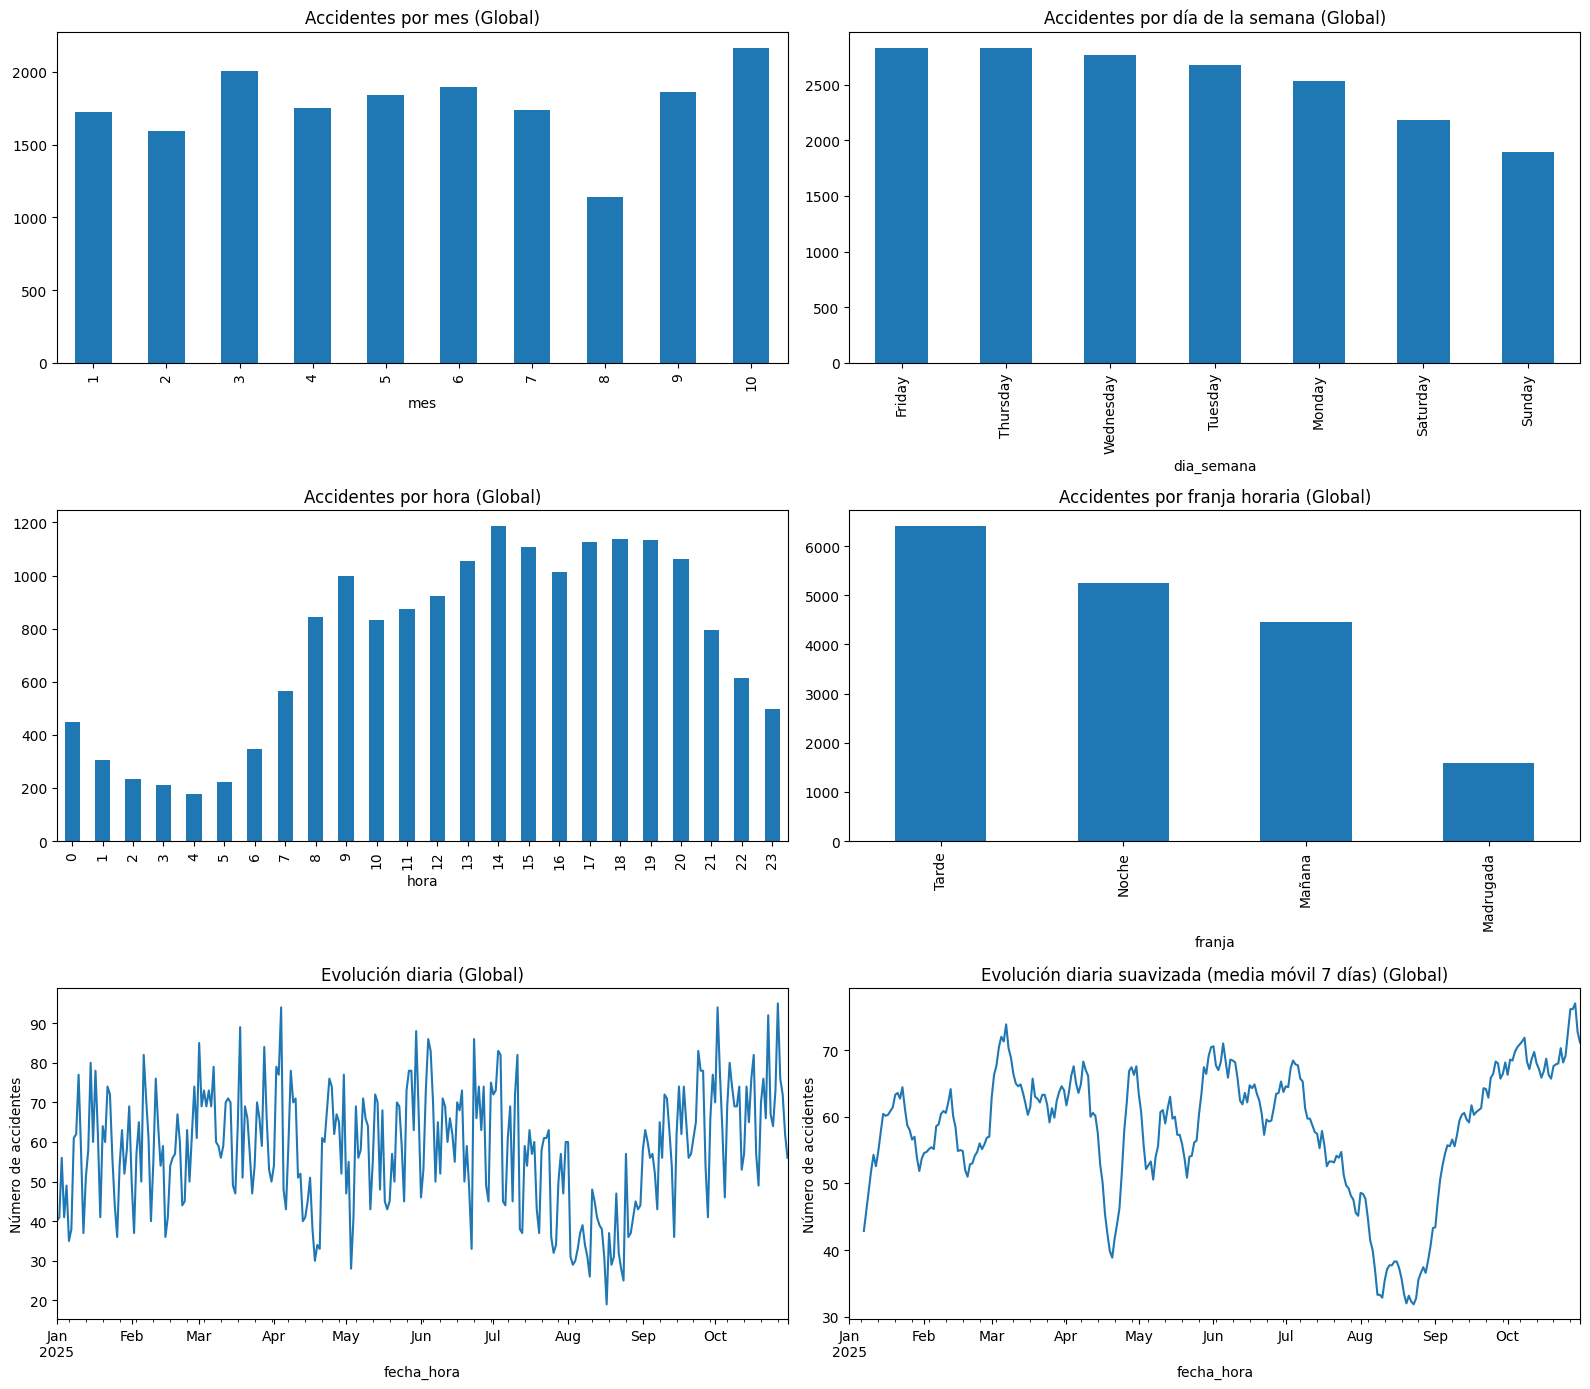

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df_unicos = preparar_accidentes_unicos(df_accidentes_2025_copy_univariante)
plot_temporal_univariate(df_unicos)



- Hay que hay seis graficas para nalisis univariante temporal  en la que la primera muestra los accidentes por mes por lo que vemos que no hya datos del mes 11 y 12, ya que son datos de este mismo año 2025 y siempre el volcado de datos va con algo de retraso. El  mes mas con mas accidentes es el 10.

- Tambien observamos en el segundo grafico de accidentes por dia de la semana y observamos que el viernes es el peor dia donde ocurren mas accidentes.

- Tambien vemos  que la peor hora donde hay mas accidentes es a las 14:00 de la tarde con un repunte sobre las 17, 18 y 19 de la tarde

Analsis distribucion espacial:
    
    

C:\Users\César\AppData\Local\Temp\ipykernel_14528\2392067692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_accidentes_2025_copy_univariante.groupby("distrito")["num_expediente"].nunique().sort_values(ascending=False).plot(


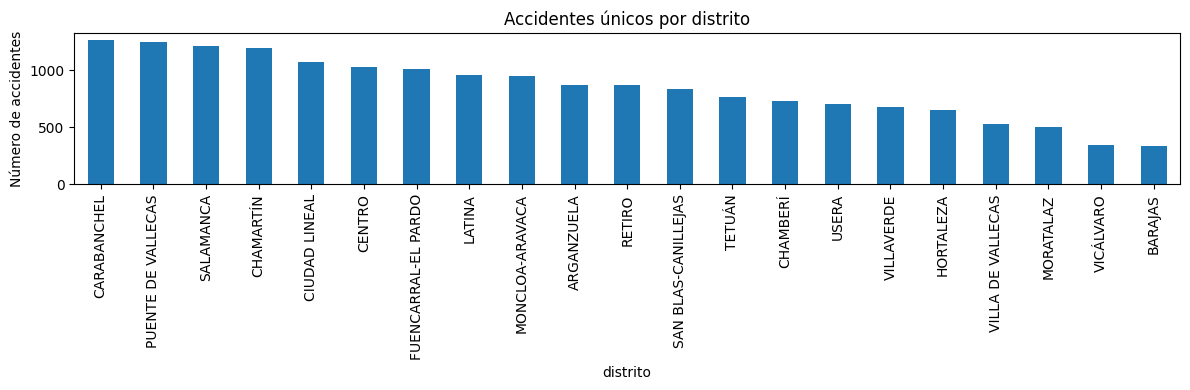

In [21]:
df_accidentes_2025_copy_univariante.groupby("distrito")["num_expediente"].nunique().sort_values(ascending=False).plot(
    kind="bar", figsize=(12,4))

plt.title("Accidentes únicos por distrito")
plt.ylabel("Número de accidentes")
plt.tight_layout()



- aqui se puede observar claramente que el distrito de Crabanchel es el que tien mas accidentes seguido de puente de vallecas y salamanca

Analisis Univariante por tipo de accidente

C:\Users\César\AppData\Local\Temp\ipykernel_14528\1242840598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_accidentes_2025_copy_univariante.groupby("tipo_accidente")["num_expediente"].nunique() \


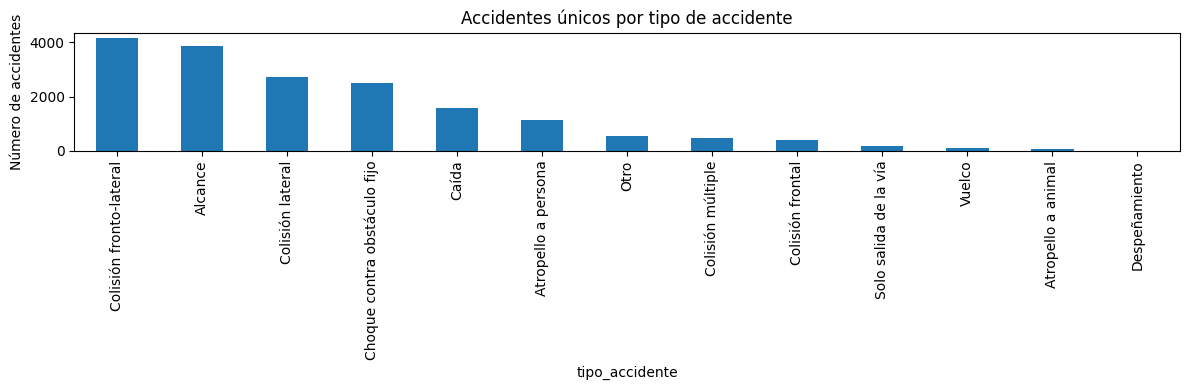

In [22]:
df_accidentes_2025_copy_univariante.groupby("tipo_accidente")["num_expediente"].nunique() \
  .sort_values(ascending=False) \
  .plot(kind="bar", figsize=(12,4))

plt.title("Accidentes únicos por tipo de accidente")
plt.ylabel("Número de accidentes")
plt.tight_layout()


- Aqui se puede observar que el accidente mas tipico en madrid es la coliison lateral

Analisdis Univariantepor tipo de persona implicada en los accidente

'df_accidentes_2025_copy_univariante.groupby("tipo_persona")["num_expediente"].nunique()   .sort_values(ascending=False)   .plot(kind="bar", figsize=(12,4))\n\nplt.title("Accidentes en los que aparece cada tipo de persona")\nplt.ylabel("Número de accidentes")\nplt.tight_layout()'

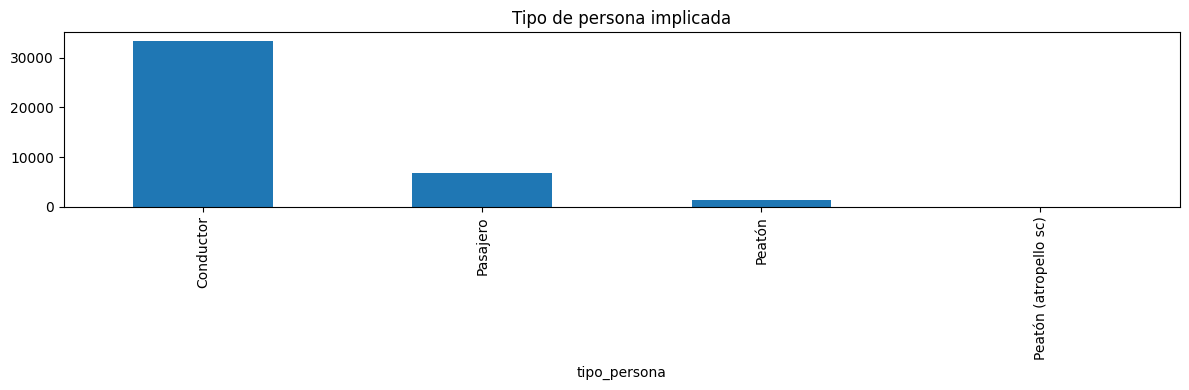

In [23]:
df_accidentes_2025_copy_univariante["tipo_persona"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Tipo de persona implicada")
plt.tight_layout()

'''df_accidentes_2025_copy_univariante.groupby("tipo_persona")["num_expediente"].nunique() \
  .sort_values(ascending=False) \
  .plot(kind="bar", figsize=(12,4))

plt.title("Accidentes en los que aparece cada tipo de persona")
plt.ylabel("Número de accidentes")
plt.tight_layout()'''


- Aqui lo que se observa que la mayoria de los choques las personas implicadas son conductores.

Analisis univariante por lesividad de cada una de las personas implicadas en el accidente

C:\Users\César\AppData\Local\Temp\ipykernel_14528\2302559883.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


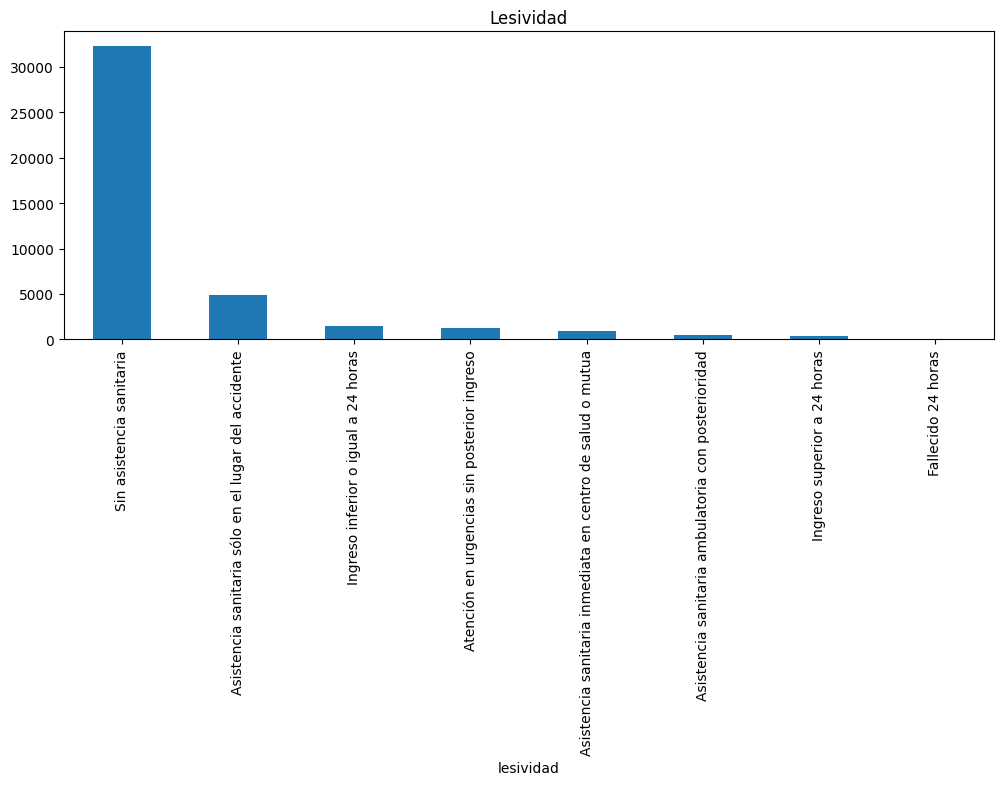

In [24]:
df_accidentes_2025_copy_univariante["lesividad"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Lesividad")
plt.tight_layout()


-La mayoria no han necesitado asistencia sanitaria 

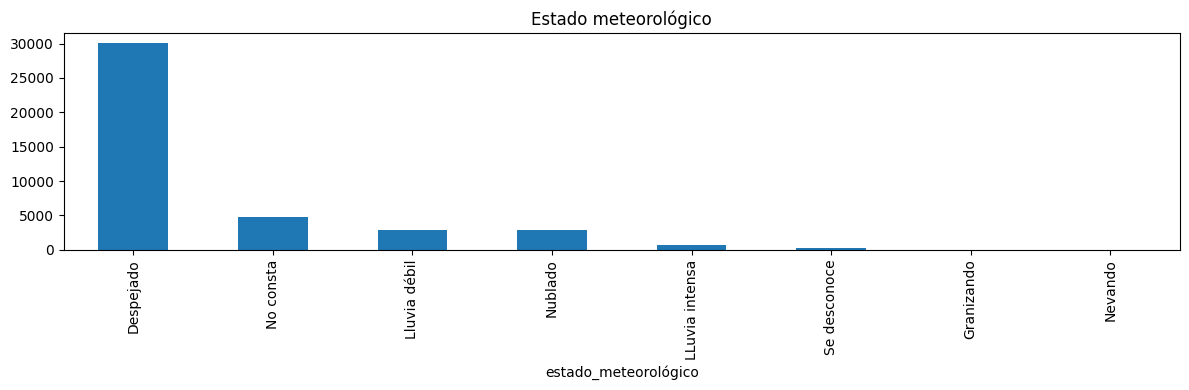

In [25]:
df_accidentes_2025_copy_univariante["estado_meteorológico"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Estado meteorológico")
plt.tight_layout()


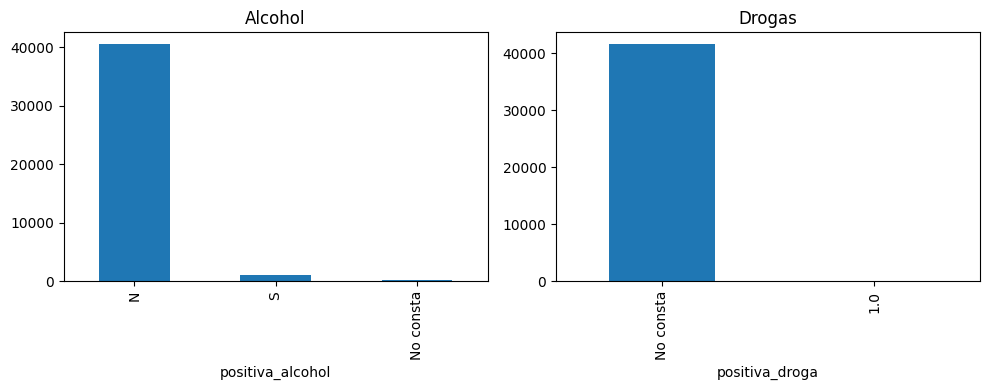

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df_accidentes_2025_copy_univariante["positiva_alcohol"].value_counts().plot(kind="bar", ax=ax[0], title="Alcohol")
df_accidentes_2025_copy_univariante["positiva_droga"].value_counts().plot(kind="bar", ax=ax[1], title="Drogas")
plt.tight_layout()


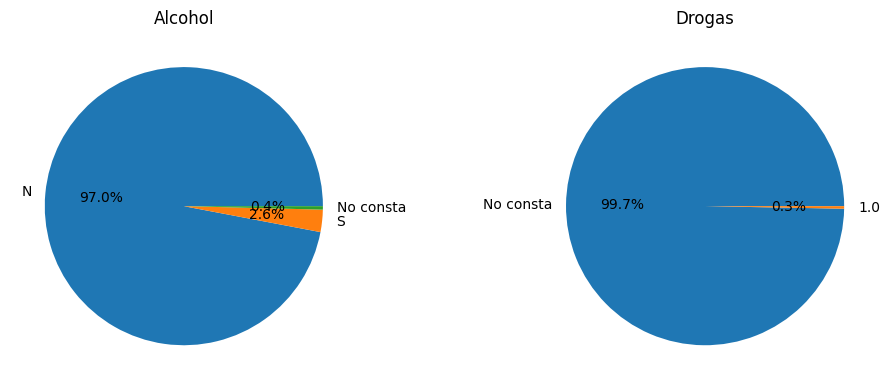

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Alcohol
df_accidentes_2025_copy_univariante["positiva_alcohol"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    ax=ax[0],
    title="Alcohol",
    ylabel=""
)

# Drogas
df_accidentes_2025_copy_univariante["positiva_droga"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    ax=ax[1],
    title="Drogas",
    ylabel=""
)

plt.tight_layout()


- La grafica del alcohol nos da poca informacion 

Analisis bivariante 

- Analisis bivariante (Tipo de accidentes por distrito)

- Aqui utilizo un mapa de calor porque uno de barras queda muy lleno y no se observa bien las relaciones y el diagrama de calor s epuede ver a simple vista de una manera mucho mas facil 

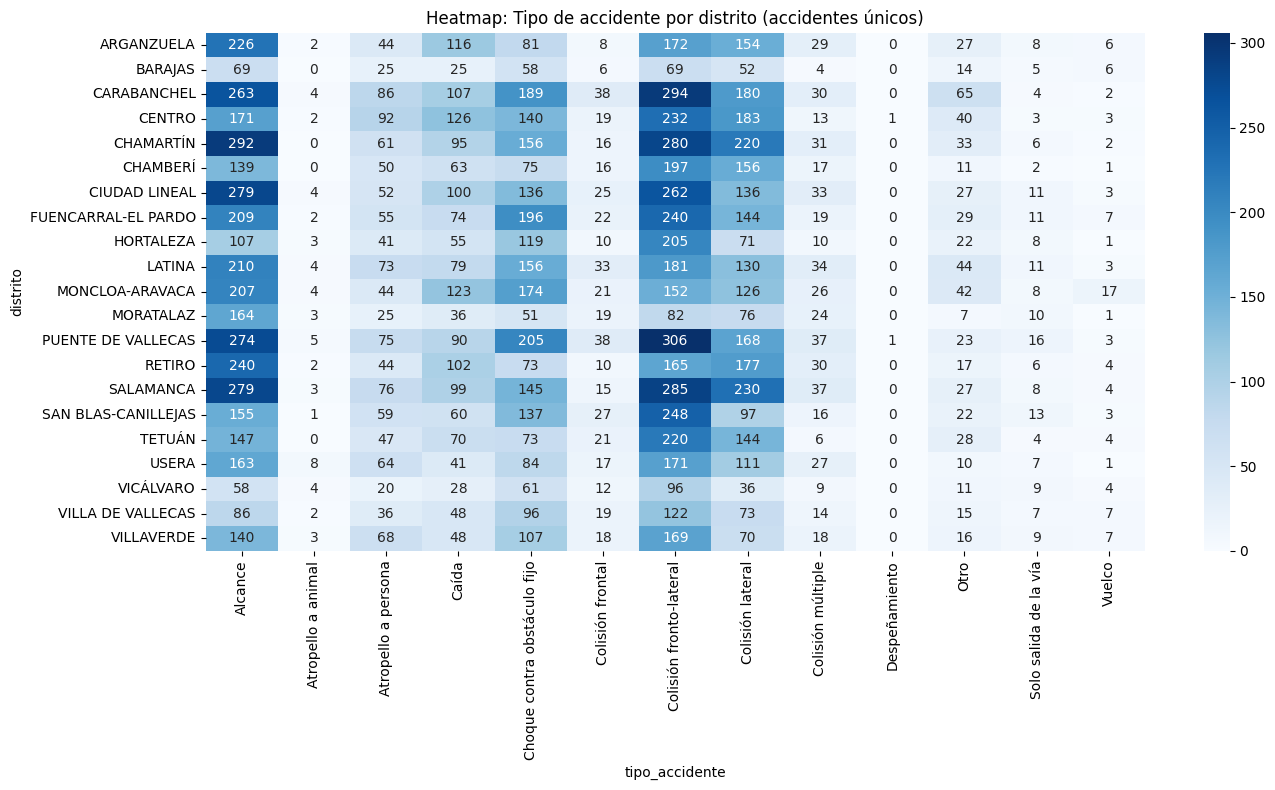

In [28]:
import seaborn as sns

# Crosstab con accidentes únicos
ct = pd.crosstab(
    df_accidentes_2025_copy_univariante["distrito"],
    df_accidentes_2025_copy_univariante["tipo_accidente"],
    values=df_accidentes_2025_copy_univariante["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(ct, annot=True, fmt=".0f", cmap="Blues")  # ← NÚMEROS EN LAS CASILLAS
plt.title("Heatmap: Tipo de accidente por distrito (accidentes únicos)")
plt.tight_layout()


1. Atropello a persona concentrado en distritos como:
CENTRO

PUENTE DE VALLECAS

CARABANCHEL

USERA

 Son zonas con alta densidad peatonal, tráfico mixto, y cruces complejos.

 2. Colisiones múltiples y frontales más frecuentes en:
FUENCARRAL-EL PARDO

MONCLOA-ARAVACA

VILLA DE VALLECAS

 Distritos con vías rápidas, interurbanas o zonas de entrada/salida de la ciudad.

 3. Alcances muy frecuentes en:
CHAMARTÍN

SALAMANCA

CIUDAD LINEAL

 Zonas con tráfico denso, semáforos, y frenadas frecuentes.

 4. Atropello a animal casi exclusivo de:
FUENCARRAL-EL PARDO

BARAJAS

 Distritos con zonas verdes, carreteras periféricas o cercanía a áreas naturales.

Test de xi cuadrado para ver si hya una relacion significativa

Para ver si dos variables categóricas presentan alguna relación (cambios conjuntos, cambios en una de un tipo se dan al mismo tiempo que cambios de otro tipo en la otra, etc) hicimos el análisis visual. Si mis datos son todos los datos que manejo, ese análisis visual ya nos dice si existe la relación, pero si mis datos no son todos o quiero extrapolarlos, tengo que ganar confianza en lo que he "visto" en el análisis visual y para ello aplicamos los test.

In [31]:

from scipy.stats import chi2_contingency

# 1. Tabla de contingencia con accidentes únicos
tabla_contingencia = pd.crosstab(
    df_accidentes_2025_copy_univariante["distrito"],
    df_accidentes_2025_copy_univariante["tipo_accidente"],
    values=df_accidentes_2025_copy_univariante["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 2. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# 3. Resultados
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


Valor Chi-Cuadrado: 933.0290522018822
P-Value: 2.3524807971410293e-82
Grados de Libertad: 240
Tabla de Frecuencias Esperadas:
 [[1.91152052e+02 2.76031845e+00 5.60443227e+01 7.81268703e+01
  1.23819999e+02 2.02094743e+01 2.04460731e+02 1.34762690e+02
  2.28712100e+01 9.85828016e-02 2.61244424e+01 8.18237254e+00
  4.38693467e+00]
 [7.29136695e+01 1.05290497e+00 2.13777314e+01 2.98009711e+01
  4.72303088e+01 7.70876856e+00 7.79901756e+01 5.14043250e+01
  8.72406979e+00 3.76037491e-02 9.96499351e+00 3.12111117e+00
  1.67336683e+00]
 [2.76327480e+02 3.99028852e+00 8.10171080e+01 1.12939416e+02
  1.78992942e+02 2.92146124e+01 2.95566371e+02 1.94811586e+02
  3.30623906e+01 1.42510304e-01 3.77652306e+01 1.18283553e+01
  6.34170854e+00]
 [2.24433968e+02 3.24092372e+00 6.58023262e+01 9.17297160e+01
  1.45378578e+02 2.37281915e+01 2.40059850e+02 1.58226526e+02
  2.68533680e+01 1.15747276e-01 3.06730281e+01 9.60702388e+00
  5.15075377e+00]
 [2.61000282e+02 3.76895715e+00 7.65232906e+01 1.06674948

P‑Value = 2.35 × 10⁻⁸²

Esto es muchísimo menor que 0.05.

En términos prácticos:

La probabilidad de que la relación observada entre distrito y tipo de accidente sea fruto del azar es casi cero.

Por tanto, rechazamos la hipótesis nula de independencia.

✅ Conclusión:  
Distrito y tipo de accidente NO son independientes.  
Sí existe relación significativa entre ambas variables.
Los distritos tienen perfiles de siniestralidad diferentes
Por ejemplo:

Distritos céntricos → más atropellos a persona

Distritos periféricos → más colisiones frontales o salidas de vía

Distritos con vías rápidas → más colisiones múltiples

Distritos con tráfico denso → más alcances y colisiones laterales

Esto no es aleatorio:
la estructura urbana, el tráfico, la densidad y el tipo de vía influyen en el tipo de accidente.

Se puede observar que las colisiones fronto-lateral son muy comunes en puente de vallecas, carabanchel y salamanca. Tambien se puede observar que hay muchos alcances en la zona de chammartin cuidad, lineal, puente de vallecas salamanca y retiro.

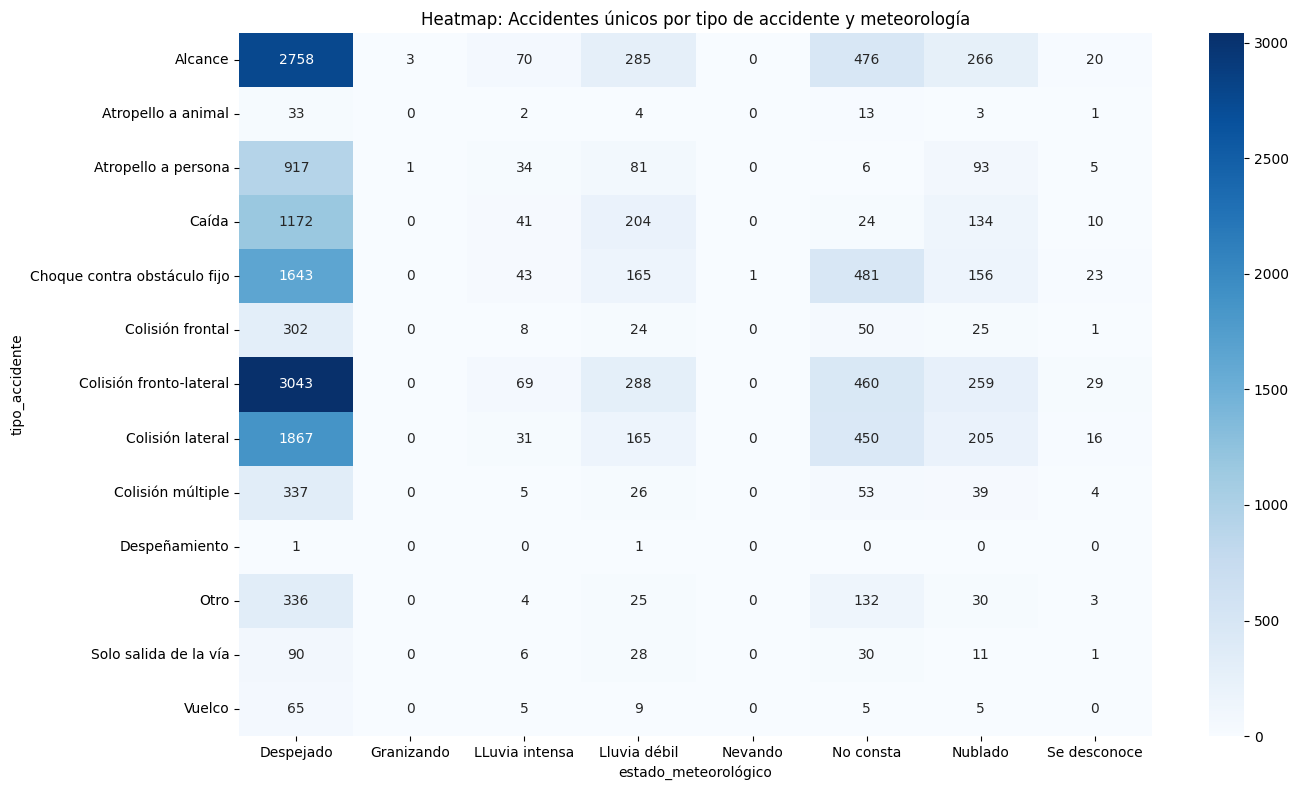

In [42]:
import seaborn as sns

ct = pd.crosstab(
    df_accidentes_2025_copy_univariante["tipo_accidente"],
    df_accidentes_2025_copy_univariante["estado_meteorológico"],
    values=df_accidentes_2025_copy_univariante["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(ct, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap: Accidentes únicos por tipo de accidente y meteorología")
plt.tight_layout()


 1. Despejado domina en todos los tipos de accidente
Especialmente en:

Alcance (2758)

Colisión fronto-lateral (3043)

Choque contra obstáculo fijo (1643)

Caída (1172)

 Esto es esperable: la mayoría de los días son despejados, y por tanto la mayoría de los accidentes ocurren en esas condiciones.
Pero no implica que el despejado sea más peligroso, sino que es más frecuente.

 2. Lluvia débil e intensa aumentan ciertos tipos de accidente
Caídas: 204 con lluvia débil, 41 con intensa

Alcances: 285 con lluvia débil, 70 con intensa

Colisión fronto-lateral: 288 con lluvia débil, 69 con intensa

Choque contra obstáculo fijo: 165 con lluvia débil, 43 con intensa

 La lluvia parece estar asociada a:

pérdida de control

frenadas mal calculadas

visibilidad reducida

Esto sí sugiere una relación significativa.

 3. Atropellos a persona también aumentan con lluvia
81 con lluvia débil

34 con lluvia intensa

93 con cielo nublado

 Esto puede indicar:

menor visibilidad

menor capacidad de reacción

peatones cruzando en condiciones adversas

 4. Granizando, nevando y despeñamiento son anecdóticos
Casi todos con valores cercanos a cero

No permiten inferencias sólidas

Pero sí confirman que son condiciones raras

 5. “No consta” y “Se desconoce” tienen valores altos en algunos tipos
Alcance: 476 (No consta)

Choque contra obstáculo fijo: 481 (No consta)

Colisión lateral: 450 (No consta)

 Esto puede indicar:

errores de registro

falta de datos en partes del sistema

necesidad de mejorar la calidad del dato

In [30]:
from scipy.stats import chi2_contingency

# 1. Tabla de contingencia con accidentes únicos
tabla_contingencia = pd.crosstab(
    df_accidentes_2025_copy_univariante["tipo_accidente"],
    df_accidentes_2025_copy_univariante["estado_meteorológico"],
    values=df_accidentes_2025_copy_univariante["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 2. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# 3. Resultados
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


Valor Chi-Cuadrado: 734.9224979868316
P-Value: 1.3003664410608894e-104
Grados de Libertad: 84
Tabla de Frecuencias Esperadas:
 [[2.75101304e+03 8.75839874e-01 6.96292699e+01 2.85742759e+02
  2.18959968e-01 4.77332731e+02 2.68444921e+02 2.47424764e+01]
 [3.97258201e+01 1.26475072e-02 1.00547682e+00 4.12624922e+00
  3.16187680e-03 6.89289142e+00 3.87646096e+00 3.57292078e-01]
 [8.06576026e+02 2.56789566e-01 2.04147705e+01 8.37775958e+01
  6.41973915e-02 1.39950313e+02 7.87060019e+01 7.25430523e+00]
 [1.12438259e+03 3.57969623e-01 2.84585851e+01 1.16787590e+02
  8.94924058e-02 1.95093445e+02 1.09717690e+02 1.01126419e+01]
 [1.78198679e+03 5.67331037e-01 4.51028175e+01 1.85091751e+02
  1.41832759e-01 3.09195415e+02 1.73886963e+02 1.60271018e+01]
 [2.90849754e+02 9.25978206e-02 7.36152673e+00 3.02100390e+01
  2.31494551e-02 5.04658122e+01 2.83812320e+01 2.61588843e+00]
 [2.94254825e+03 9.36818926e-01 7.44771046e+01 3.05637175e+02
  2.34204732e-01 5.10566315e+02 2.87135001e+02 2.64651347e+01

✅ 1. El p‑value es extraordinariamente pequeño
P‑Value = 1.3 × 10⁻¹⁰⁴

Esto es muchísimo menor que 0.05.

En términos prácticos:

La probabilidad de que la relación observada entre tipo de accidente y meteorología sea fruto del azar es prácticamente cero.

Por tanto, rechazamos la hipótesis nula de independencia.

✅ Conclusión:  
El tipo de accidente depende del estado meteorológico.  
Las variables NO son independientes.

✅ 2. El valor Chi‑cuadrado es muy alto
Chi² = 734.92  
Grados de libertad = 84

Un chi² tan elevado indica que:

Las diferencias entre lo observado y lo esperado son muy grandes.

Es decir, la meteorología influye claramente en el tipo de accidente.

Esto encaja perfectamente con lo que viste en el heatmap:

La lluvia débil e intensa incrementan caídas, alcances y colisiones.

Los atropellos a persona aumentan con lluvia y nublado.

Los choques contra obstáculo fijo también crecen con condiciones adversas.

“Despejado” domina porque es la condición más frecuente, no porque sea la más peligrosa.

✅ 3. ¿Qué significa esto en términos prácticos?
Puedes afirmar con rigor que:

✅ La meteorología afecta al tipo de accidente
o, dicho de otra forma:

✅ Algunos tipos de accidente son más probables bajo ciertas condiciones meteorológicas
Ejemplos claros:

Lluvia débil/intensa → más caídas, alcances y colisiones fronto‑laterales

Nublado → más atropellos a persona

Despejado → mayoría de accidentes por frecuencia de días despejados

Granizo y nieve → casos anecdóticos

“No consta” → problemas de calidad del dato

-Aqui lo que observo es que el mal timpo no tiene una importancia significativa sobre los diferentes tipos de accidentes. Si es verdad que la lluvia debil en colision fronto lateral y alcance tiene unos cuantos accidentes pero hay muchos mas en dias despejados por lo que el clima creemos que no tiene una relacion significativa.

## MULTIVARIANTE

##PROBANDO

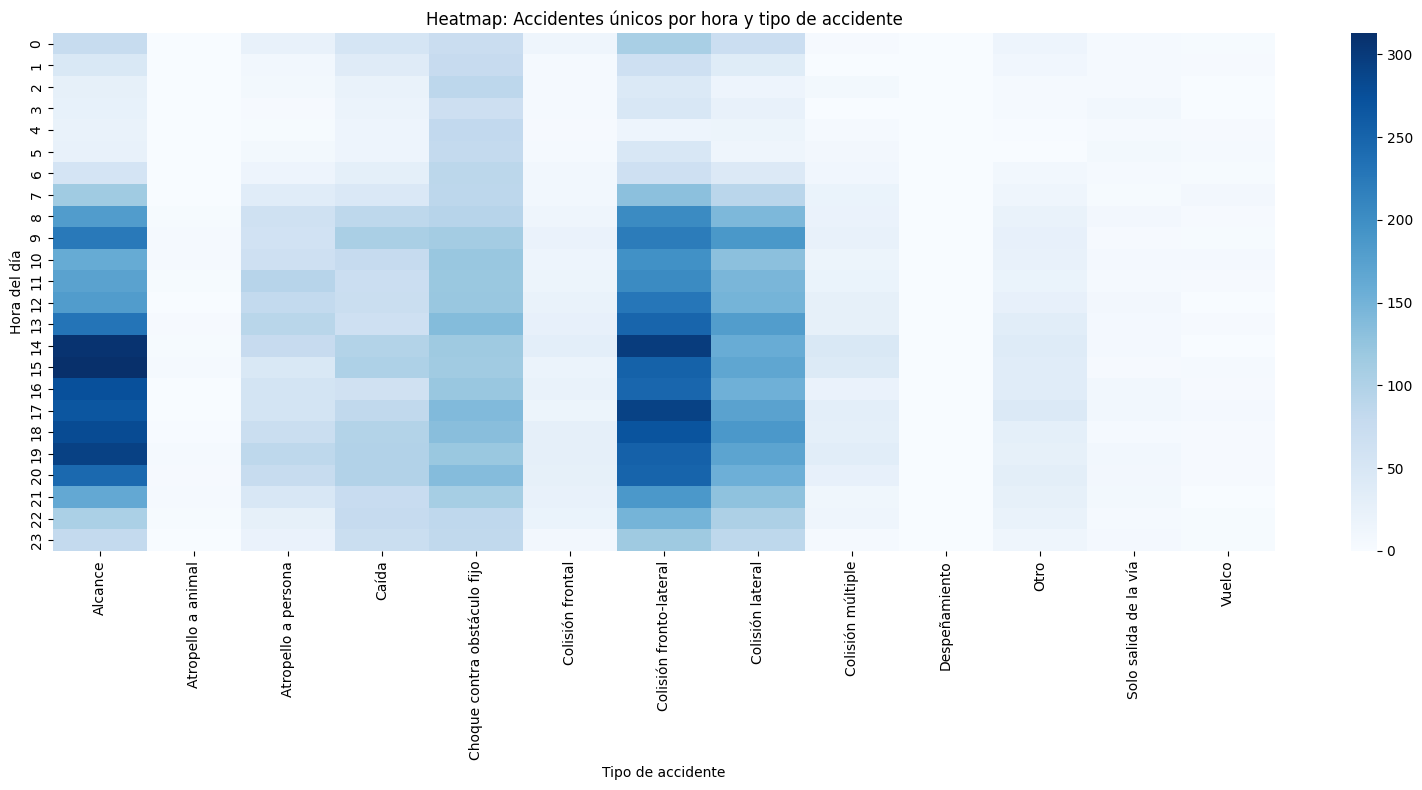

In [36]:
df_accidentes_2025_copy_univariante["hora_num"] = (
    df_accidentes_2025_copy_univariante["fecha_hora"].dt.hour
)
ct_hora_tipo = pd.crosstab(
    df_accidentes_2025_copy_univariante["hora_num"],
    df_accidentes_2025_copy_univariante["tipo_accidente"],
    values=df_accidentes_2025_copy_univariante["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

plt.figure(figsize=(16,8))
sns.heatmap(ct_hora_tipo, cmap="Blues", annot=False)
plt.title("Heatmap: Accidentes únicos por hora y tipo de accidente")
plt.xlabel("Tipo de accidente")
plt.ylabel("Hora del día")
plt.tight_layout()



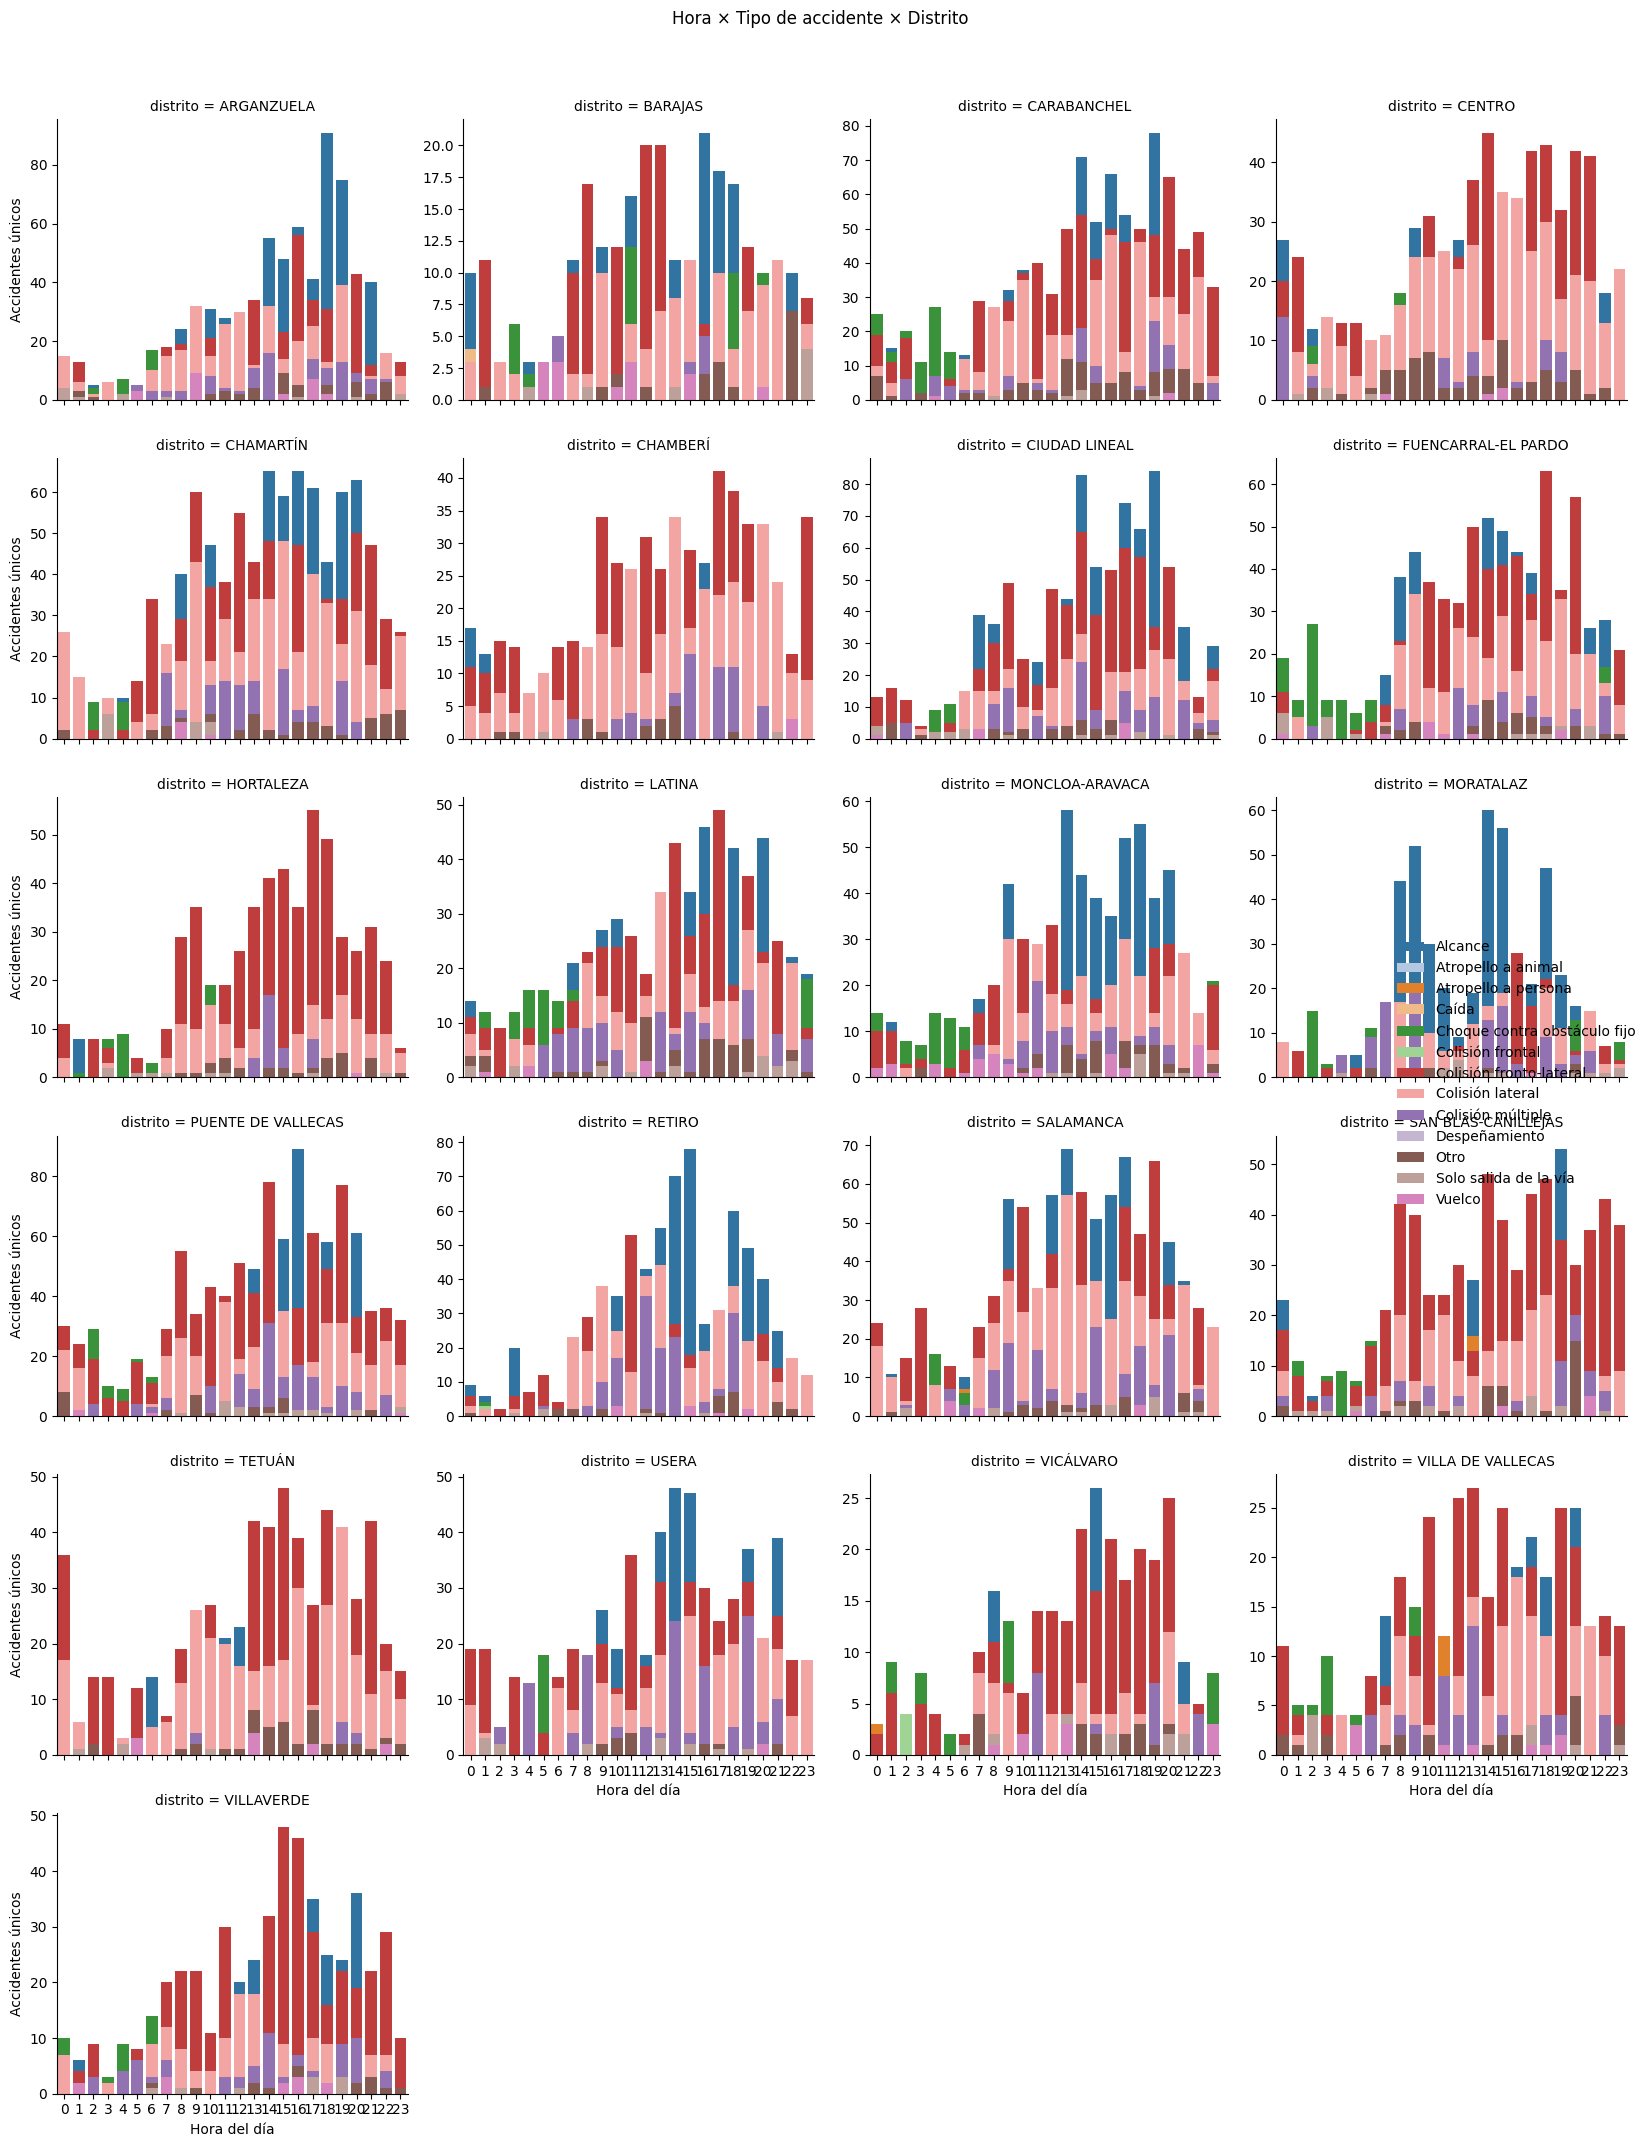

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar columna hora_num
df_accidentes_2025_copy_univariante["hora_num"] = (
    df_accidentes_2025_copy_univariante["fecha_hora"].dt.hour
)

# Crear FacetGrid: un gráfico por distrito
g = sns.FacetGrid(
    df_accidentes_2025_copy_univariante,
    col="distrito",
    col_wrap=4,
    height=3.5,
    sharey=False
)

g.map_dataframe(
    sns.countplot,
    x="hora_num",
    hue="tipo_accidente",
    palette="tab20",
    dodge=False
)

g.add_legend()
g.set_axis_labels("Hora del día", "Accidentes únicos")
g.fig.suptitle("Hora × Tipo de accidente × Distrito", y=1.02)

plt.tight_layout()
plt.show()


## 2024

- Primero cargamos el dataset de acccidentalidad de madrid del año 2024:

In [13]:
df_accidentes_2024 = pd.read_csv(
    "./data/2024_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)



Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [14]:
df_accidentes_2024.shape

(49340, 19)

-Aqui observamos que tiene 19 columnas igual que 2025 y tiene 49340 filas

Ahora para el formato real de los datos y detectar valores a simple vista

In [15]:
df_accidentes_2024.head()

num_expediente       fecha      hora  \
0    2023S040280  04/01/2024  14:09:00   
1    2023S040280  04/01/2024  14:09:00   
2    2023S040309  15/02/2024  14:05:00   
3    2023S040309  15/02/2024  14:05:00   
4    2023S040310  18/02/2024  10:40:00   

                               localizacion numero  cod_distrito   distrito  \
0  AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11      3            16  HORTALEZA   
1  AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11      3            16  HORTALEZA   
2                CALL. TESORO / CALL. MINAS     18             1     CENTRO   
3                CALL. TESORO / CALL. MINAS     18             1     CENTRO   
4    GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO      3             7   CHAMBERÍ   

            tipo_accidente estado_meteorológico            tipo_vehiculo  \
0  Colisión fronto-lateral         Lluvia débil      Motocicleta > 125cc   
1  Colisión fronto-lateral         Lluvia débil                  Turismo   
2  Colisión fronto-lateral         Lluvia débil                Bicicleta   
3  Colisión fronto-lateral         Lluvia débil  Motocicleta hasta 125cc   
4         Colisión lateral            Despejado                  Turismo   

  tipo_persona       rango_edad    sexo  cod_lesividad  \
0    Conductor  De 55 a 59 años  Hombre            2.0   
1    Conductor  De 55 a 59 años   Mujer           14.0   
2    Conductor  De 25 a 29 años  Hombre            7.0   
3    Conductor  De 35 a 39 años  Hombre           14.0   
4    Conductor  De 25 a 29 años  Hombre            NaN   

                                           lesividad  coordenada_x_utm  \
0                Ingreso inferior o igual a 24 horas          444913.0   
1                           Sin asistencia sanitaria          444913.0   
2  Asistencia sanitaria sólo en el lugar del acci...          440123.0   
3                           Sin asistencia sanitaria          440123.0   
4                                                NaN          440137.0   

   coordenada_y_utm positiva_alcohol  positiva_droga  
0         4481427.0                N             NaN  
1         4481427.0                N             NaN  
2         4475170.0                N             NaN  
3         4475170.0                N             NaN  
4         4475721.0                N             NaN

In [16]:
df_accidentes_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        49340 non-null  object 
 1   fecha                 49340 non-null  object 
 2   hora                  49340 non-null  object 
 3   localizacion          49340 non-null  object 
 4   numero                49340 non-null  object 
 5   cod_distrito          49340 non-null  int64  
 6   distrito              49340 non-null  object 
 7   tipo_accidente        49335 non-null  object 
 8   estado_meteorológico  43424 non-null  object 
 9   tipo_vehiculo         48946 non-null  object 
 10  tipo_persona          49340 non-null  object 
 11  rango_edad            49340 non-null  object 
 12  sexo                  49340 non-null  object 
 13  cod_lesividad         27344 non-null  float64
 14  lesividad             27344 non-null  object 
 15  coordenada_x_utm   

Aqui procedemos hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demas.

In [17]:
df_accidentes_2024_copy=df_accidentes_2024.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.
- La cardinalidad de las diferentes variables para decidir cuales son categoricas o no. Se calcula de la siguiente manera: 
$$Cardinalidad(<Columna/Característica>) = \dfrac{NúmerodeValoresUnicos(<Columna/Característica>)}{NúmeroTotalDeRegistros}* 100\%$$

In [18]:
# Número de nulos 
nulos = df_accidentes_2024_copy.isna().sum() 
# Porcentaje de nulos 
nulos_pct = (nulos / len(df_accidentes_2024_copy) * 100).round(2) 
# Cardinalidad 
card = df_accidentes_2024_copy.nunique() 
# Porcentaje de cardinalidad 
card_pct = (card / len(df_accidentes_2024_copy) * 100).round(2) 
# Tipo de dato 
tipos = df_accidentes_2024_copy.dtypes 
#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 
# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

nulos  % nulos  cardinalidad  % cardinalidad     tipo
num_expediente            0     0.00         20698           41.95   object
localizacion              0     0.00         15131           30.67   object
coordenada_y_utm          6     0.01         10997           22.29  float64
coordenada_x_utm          6     0.01         10131           20.53  float64
numero                    0     0.00          1759            3.57   object
hora                      0     0.00          1256            2.55   object
fecha                     0     0.00           366            0.74   object
tipo_vehiculo           394     0.80            32            0.06   object
cod_distrito              0     0.00            21            0.04    int64
distrito                  0     0.00            21            0.04   object
rango_edad                0     0.00            18            0.04   object
tipo_accidente            5     0.01            12            0.02   object
cod_lesividad         21996    44.58             9            0.02  float64
lesividad             21996    44.58             9            0.02   object
estado_meteorológico   5916    11.99             7            0.01   object
tipo_persona              0     0.00             3            0.01   object
sexo                      0     0.00             3            0.01   object
positiva_alcohol        167     0.34             2            0.00   object
positiva_droga        49137    99.59             1            0.00  float64

In [19]:
df_accidentes_2024_copy["fecha"] = pd.to_datetime(df_accidentes_2024_copy["fecha"], errors="coerce", dayfirst=True) 
df_accidentes_2024_copy["hora"] = pd.to_datetime(df_accidentes_2024_copy["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_accidentes_2024_copy["fecha_hora"] = df_accidentes_2024_copy.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_accidentes_2024_copy[col] = df_accidentes_2024_copy[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

In [20]:

# 1. ESTADO METEOROLÓGICO

if 'estado_meteorológico' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['estado_meteorológico'] = df_accidentes_2024_copy['estado_meteorológico'].fillna('No consta')

# 2. TIPO VEHÍCULO

if 'tipo_vehiculo' in df_accidentes_2024_copy.columns and 'tipo_persona' in df_accidentes_2024_copy.columns:

    # Peatón y testigo → No aplica
    mask_no_aplica = df_accidentes_2024_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo'])
    df_accidentes_2024_copy.loc[
        mask_no_aplica & df_accidentes_2024_copy['tipo_vehiculo'].isna(),
        'tipo_vehiculo'
    ] = 'No aplica'

    # El resto de nulos → No consta
    df_accidentes_2024_copy['tipo_vehiculo'] = df_accidentes_2024_copy['tipo_vehiculo'].fillna('No consta')

# 3. LESIVIDAD (ORDINAL)

if 'cod_lesividad' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['cod_lesividad'] = df_accidentes_2024_copy['cod_lesividad'].fillna(14)

if 'lesividad' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['lesividad'] = df_accidentes_2024_copy['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL Y DROGAS

if 'positiva_alcohol' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['positiva_alcohol'] = df_accidentes_2024_copy['positiva_alcohol'].fillna('No consta')

if 'positiva_droga' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['positiva_droga'] = df_accidentes_2024_copy['positiva_droga'].fillna('No consta')

# 5. NUMERO

if 'numero' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['numero'] = df_accidentes_2024_copy['numero'].fillna('No aplica')
    
# 6. TIPO DE ACCIDENTE 
if 'tipo_accidente' in df_accidentes_2024_copy.columns:
    df_accidentes_2024_copy['tipo_accidente'] = df_accidentes_2024_copy['tipo_accidente'].fillna('No consta')


In [21]:
# 6. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 'positiva_droga' 
                 ] 
for col in cols_category: 
    df_accidentes_2024_copy[col] = df_accidentes_2024_copy[col].astype('category')

In [22]:
df_accidentes_2024_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  49340 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                49340 non-null  object        
 5   cod_distrito          49340 non-null  category      
 6   distrito              49340 non-null  category      
 7   tipo_accidente        49340 non-null  category      
 8   estado_meteorológico  49340 non-null  category      
 9   tipo_vehiculo         49340 non-null  category      
 10  tipo_persona          49340 non-null  category      
 11  rango_edad            49340 non-null  category      
 12  sexo                  49340 non-null  category      
 13  cod_lesividad   

- Faltan 2023, 2022, 2021 y 2020

## Analisis Univariante de 2025 

In [20]:
# Ver qué meses aparecen realmente en el dataset
print(df_accidentes_2025_copy['mes'].unique())

# Contar accidentes por mes
print(df_accidentes_2025_copy['mes'].value_counts().sort_index())


[ 1  2  3  4  5  6  7  8  9 10]
mes
1     4085
2     3813
3     4607
4     4214
5     4376
6     4439
7     4118
8     2672
9     4402
10    5004
Name: count, dtype: int64


In [70]:
df_accidentes_2024_copy=df_accidentes_2024.copy()

#La colmna de la fecha la paso a datatime:

df_accidentes_2024_copy["fecha"] = pd.to_datetime(df_accidentes_2024_copy["fecha"], errors="coerce", dayfirst=True)

#Aqui convierto la columna localizacion a string:

df_accidentes_2024_copy["localizacion"] = df_accidentes_2024_copy["localizacion"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2024_copy["localizacion"] = (
    df_accidentes_2024_copy["localizacion"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2024_copy["distrito"] = df_accidentes_2024_copy["distrito"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2024_copy["distrito"] = (
    df_accidentes_2024_copy["distrito"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2024_copy

num_expediente      fecha      hora  \
0        2023S040280 2024-01-04  14:09:00   
1        2023S040280 2024-01-04  14:09:00   
2        2023S040309 2024-02-15  14:05:00   
3        2023S040309 2024-02-15  14:05:00   
4        2023S040310 2024-02-18  10:40:00   
...              ...        ...       ...   
49335    2024S035474 2024-12-23  11:35:00   
49336    2024S035479 2024-12-03   9:45:00   
49337    2024S035479 2024-12-03   9:45:00   
49338    2024S035480 2024-12-29  19:15:00   
49339    2024S035480 2024-12-29  19:15:00   

                                   localizacion numero  cod_distrito  \
0      avda. niceto alcala zamora / autov. m-11      3            16   
1      avda. niceto alcala zamora / autov. m-11      3            16   
2                    call. tesoro / call. minas     18             1   
3                    call. tesoro / call. minas     18             1   
4        gta. ruiz jimenez / call. san bernardo      3             7   
...                                         ...    ...           ...   
49335    call. lucano / call. canal del bosforo      1            20   
49336         gta. san vicente / avda. portugal      1             9   
49337         gta. san vicente / avda. portugal      1             9   
49338             plaza. cibeles / call. alcala      1             3   
49339             plaza. cibeles / call. alcala      1             3   

                  distrito           tipo_accidente estado_meteorológico  \
0                hortaleza  Colisión fronto-lateral         Lluvia débil   
1                hortaleza  Colisión fronto-lateral         Lluvia débil   
2                   centro  Colisión fronto-lateral         Lluvia débil   
3                   centro  Colisión fronto-lateral         Lluvia débil   
4                 chamberí         Colisión lateral            Despejado   
...                    ...                      ...                  ...   
49335  san blas-canillejas                     Otro            Despejado   
49336      moncloa-aravaca                     Otro            Despejado   
49337      moncloa-aravaca                     Otro            Despejado   
49338               retiro  Colisión fronto-lateral            Despejado   
49339               retiro  Colisión fronto-lateral            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0          Motocicleta > 125cc    Conductor  De 55 a 59 años  Hombre   
1                      Turismo    Conductor  De 55 a 59 años   Mujer   
2                    Bicicleta    Conductor  De 25 a 29 años  Hombre   
3      Motocicleta hasta 125cc    Conductor  De 35 a 39 años  Hombre   
4                      Turismo    Conductor  De 25 a 29 años  Hombre   
...                        ...          ...              ...     ...   
49335            Camión rígido    Conductor  De 25 a 29 años  Hombre   
49336                  Autobús    Conductor  De 40 a 44 años  Hombre   
49337                  Turismo    Conductor  De 50 a 54 años  Hombre   
49338                  Turismo    Conductor  De 35 a 39 años  Hombre   
49339                  Turismo    Conductor  De 45 a 49 años  Hombre   

       cod_lesividad                                          lesividad  \
0                2.0                Ingreso inferior o igual a 24 horas   
1               14.0                           Sin asistencia sanitaria   
2                7.0  Asistencia sanitaria sólo en el lugar del acci...   
3               14.0                           Sin asistencia sanitaria   
4                NaN                                                NaN   
...              ...                                                ...   
49335            NaN                                                NaN   
49336            NaN                                                NaN   
49337            NaN                                                NaN   
49338            NaN                                                NaN 

In [72]:
df_accidentes_2024_copy['hora'] = pd.to_datetime(df_accidentes_2024_copy['hora'], format='%H:%M:%S', errors='coerce').dt.time
#df_accidentes_copy['hora'].head() df_accidentes_copy['hora'].dtype # seguirá siendo object (datetime.time)

df_accidentes_2024_copy['fecha_hora'] = df_accidentes_2024_copy.apply( lambda row: pd.Timestamp.combine(row['fecha'], row['hora']) if pd.notnull(row['fecha']) and pd.notnull(row['hora']) else pd.NaT, axis=1 )


df_accidentes_2024_copy['numero'] = pd.to_numeric(df_accidentes_2024_copy['numero'], errors='coerce') 
df_accidentes_2024_copy['positiva_alcohol'] = df_accidentes_2024_copy['positiva_alcohol'].map({'S':1, 'N':0}) 
df_accidentes_2024_copy['positiva_droga'] = df_accidentes_2024_copy['positiva_droga'].fillna(0).astype(int)

df_accidentes_2024_copy

num_expediente      fecha      hora  \
0        2023S040280 2024-01-04  00:49:00   
1        2023S040280 2024-01-04  00:49:00   
2        2023S040309 2024-02-15  00:49:00   
3        2023S040309 2024-02-15  02:20:00   
4        2023S040310 2024-02-18  02:20:00   
...              ...        ...       ...   
49335    2024S035474 2024-12-23       NaT   
49336    2024S035479 2024-12-03       NaT   
49337    2024S035479 2024-12-03       NaT   
49338    2024S035480 2024-12-29       NaT   
49339    2024S035480 2024-12-29       NaT   

                                   localizacion  numero  cod_distrito  \
0      avda. niceto alcala zamora / autov. m-11     3.0            16   
1      avda. niceto alcala zamora / autov. m-11     3.0            16   
2                    call. tesoro / call. minas    18.0             1   
3                    call. tesoro / call. minas    18.0             1   
4        gta. ruiz jimenez / call. san bernardo     3.0             7   
...                                         ...     ...           ...   
49335    call. lucano / call. canal del bosforo     1.0            20   
49336         gta. san vicente / avda. portugal     1.0             9   
49337         gta. san vicente / avda. portugal     1.0             9   
49338             plaza. cibeles / call. alcala     1.0             3   
49339             plaza. cibeles / call. alcala     1.0             3   

                  distrito           tipo_accidente estado_meteorológico  \
0                hortaleza  Colisión fronto-lateral         Lluvia débil   
1                hortaleza  Colisión fronto-lateral         Lluvia débil   
2                   centro  Colisión fronto-lateral         Lluvia débil   
3                   centro  Colisión fronto-lateral         Lluvia débil   
4                 chamberí         Colisión lateral            Despejado   
...                    ...                      ...                  ...   
49335  san blas-canillejas                     Otro            Despejado   
49336      moncloa-aravaca                     Otro            Despejado   
49337      moncloa-aravaca                     Otro            Despejado   
49338               retiro  Colisión fronto-lateral            Despejado   
49339               retiro  Colisión fronto-lateral            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0          Motocicleta > 125cc    Conductor  De 55 a 59 años  Hombre   
1                      Turismo    Conductor  De 55 a 59 años   Mujer   
2                    Bicicleta    Conductor  De 25 a 29 años  Hombre   
3      Motocicleta hasta 125cc    Conductor  De 35 a 39 años  Hombre   
4                      Turismo    Conductor  De 25 a 29 años  Hombre   
...                        ...          ...              ...     ...   
49335            Camión rígido    Conductor  De 25 a 29 años  Hombre   
49336                  Autobús    Conductor  De 40 a 44 años  Hombre   
49337                  Turismo    Conductor  De 50 a 54 años  Hombre   
49338                  Turismo    Conductor  De 35 a 39 años  Hombre   
49339                  Turismo    Conductor  De 45 a 49 años  Hombre   

       cod_lesividad                                          lesividad  \
0                2.0                Ingreso inferior o igual a 24 horas   
1               14.0                           Sin asistencia sanitaria   
2                7.0  Asistencia sanitaria sólo en el lugar del acci...   
3               14.0                           Sin asistencia sanitaria   
4                NaN                                                NaN   
...              ...                                                ...   
49335            NaN                                                NaN   
49336            NaN                                                NaN   
49337            NaN                                                NaN   
49338            NaN                                        

In [73]:
df_accidentes_2024_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  41730 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                42676 non-null  float64       
 5   cod_distrito          49340 non-null  int64         
 6   distrito              49340 non-null  object        
 7   tipo_accidente        49335 non-null  object        
 8   estado_meteorológico  43424 non-null  object        
 9   tipo_vehiculo         48946 non-null  object        
 10  tipo_persona          49340 non-null  object        
 11  rango_edad            49340 non-null  object        
 12  sexo                  49340 non-null  object        
 13  cod_lesividad   

In [74]:
# 1. estado_meteorológico 

df_accidentes_2024_copy['estado_meteorológico'] = df_accidentes_2024_copy['estado_meteorológico'].fillna('No consta') 

# # 2. tipo_vehiculo

mask_no_aplica = df_accidentes_2024_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

df_accidentes_2024_copy.loc[mask_no_aplica & df_accidentes_2024_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo'] = 'No aplica' 


# Rellenar el resto de nulos con "No consta" 

df_accidentes_2024_copy['tipo_vehiculo'] = df_accidentes_2024_copy['tipo_vehiculo'].fillna('No consta')

# 3. Lesividad 

df_accidentes_2024_copy['cod_lesividad'] = df_accidentes_2024_copy['cod_lesividad'].fillna(14) 

df_accidentes_2024_copy['lesividad'] = df_accidentes_2024_copy['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. Alcohol y drogas 

df_accidentes_2024_copy['positiva_alcohol'] = df_accidentes_2024_copy['positiva_alcohol'].fillna('No consta') 

df_accidentes_2024_copy['positiva_droga'] = df_accidentes_2024_copy['positiva_droga'].fillna('No consta')

In [75]:
df_accidentes_2024_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  41730 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                42676 non-null  float64       
 5   cod_distrito          49340 non-null  int64         
 6   distrito              49340 non-null  object        
 7   tipo_accidente        49335 non-null  object        
 8   estado_meteorológico  49340 non-null  object        
 9   tipo_vehiculo         49340 non-null  object        
 10  tipo_persona          49340 non-null  object        
 11  rango_edad            49340 non-null  object        
 12  sexo                  49340 non-null  object        
 13  cod_lesividad   

- Tratamiento 2023

In [23]:
df_accidentes_2023 = pd.read_csv(
    "./data/2023_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_accidentes_2023

num_expediente       fecha      hora  \
0        2023S000001  01/01/2023   1:15:00   
1        2023S000001  01/01/2023   1:15:00   
2        2023S000001  01/01/2023   1:15:00   
3        2023S000001  01/01/2023   1:15:00   
4        2023S000001  01/01/2023   1:15:00   
...              ...         ...       ...   
48825    2023S040267  31/12/2023  21:15:00   
48826    2023S040267  31/12/2023  21:15:00   
48827    2023S040277  29/12/2023   9:35:00   
48828    2023S040277  29/12/2023   9:35:00   
48829    2023S040290  29/12/2023   5:10:00   

                                         localizacion numero  cod_distrito  \
0                              AVDA. ALFONSO XIII, 33     33           5.0   
1                              AVDA. ALFONSO XIII, 33     33           5.0   
2                              AVDA. ALFONSO XIII, 33     33           5.0   
3                              AVDA. ALFONSO XIII, 33     33           5.0   
4                              AVDA. ALFONSO XIII, 33     33           5.0   
...                                               ...    ...           ...   
48825  AVDA. GRAN VIA DE VILLAVERDE / AVDA. ANDALUCIA     10          17.0   
48826  AVDA. GRAN VIA DE VILLAVERDE / AVDA. ANDALUCIA     10          17.0   
48827                                  PTA. TOLEDO, 0      0           1.0   
48828                                  PTA. TOLEDO, 0      0           1.0   
48829       CALL. HERNANDEZ DE TEJADA / CALL. AGASTIA      2          15.0   

            distrito           tipo_accidente estado_meteorológico  \
0          CHAMARTÍN                  Alcance            Despejado   
1          CHAMARTÍN                  Alcance            Despejado   
2          CHAMARTÍN                  Alcance            Despejado   
3          CHAMARTÍN                  Alcance            Despejado   
4          CHAMARTÍN                  Alcance            Despejado   
...              ...                      ...                  ...   
48825     VILLAVERDE  Colisión fronto-lateral            Despejado   
48826     VILLAVERDE  Colisión fronto-lateral            Despejado   
48827         CENTRO                  Alcance            Despejado   
48828         CENTRO                  Alcance            Despejado   
48829  CIUDAD LINEAL    Solo salida de la vía            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                 Todo terreno    Conductor  De 55 a 59 años   Mujer   
1                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
2                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
3                 Todo terreno     Pasajero  De 21 a 24 años   Mujer   
4                 Todo terreno     Pasajero  De 55 a 59 años  Hombre   
...                        ...          ...              ...     ...   
48825                  Turismo     Pasajero  De 45 a 49 años   Mujer   
48826                  Turismo     Pasajero    De 6 a 9 años  Hombre   
48827  Motocicleta hasta 125cc    Conductor  De 45 a 49 años  Hombre   
48828                  Turismo    Conductor  De 21 a 24 años  Hombre   
48829                  Turismo    Conductor  De 21 a 24 años  Hombre   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1               14.0                           Sin asistencia sanitaria   
2               14.0                           Sin asistencia sanitaria   
3                7.0  Asistencia sanitaria sólo en el lugar del acci...   
4                7.0  Asistencia sanitaria sólo en el lugar del acci...   
...              ...                                                ...   
48825            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48826            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48827            NaN                                                NaN   
48828            NaN                                        

In [24]:
df_accidentes_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        48830 non-null  object 
 1   fecha                 48830 non-null  object 
 2   hora                  48830 non-null  object 
 3   localizacion          48830 non-null  object 
 4   numero                48827 non-null  object 
 5   cod_distrito          48827 non-null  float64
 6   distrito              48827 non-null  object 
 7   tipo_accidente        48830 non-null  object 
 8   estado_meteorológico  43127 non-null  object 
 9   tipo_vehiculo         48452 non-null  object 
 10  tipo_persona          48830 non-null  object 
 11  rango_edad            48830 non-null  object 
 12  sexo                  48830 non-null  object 
 13  cod_lesividad         25945 non-null  float64
 14  lesividad             25945 non-null  object 
 15  coordenada_x_utm   

In [25]:
df_accidentes_2023_copy=df_accidentes_2023.copy()

#La colmna de la fecha la paso a datatime:

df_accidentes_2023_copy["fecha"] = pd.to_datetime(df_accidentes_2023_copy["fecha"], errors="coerce", dayfirst=True)

#Aqui convierto la columna localizacion a string:

df_accidentes_2023_copy["localizacion"] = df_accidentes_2023_copy["localizacion"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2023_copy["localizacion"] = (
    df_accidentes_2023_copy["localizacion"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2023_copy["distrito"] = df_accidentes_2023_copy["distrito"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2023_copy["distrito"] = (
    df_accidentes_2023_copy["distrito"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2023_copy

num_expediente      fecha      hora  \
0        2023S000001 2023-01-01   1:15:00   
1        2023S000001 2023-01-01   1:15:00   
2        2023S000001 2023-01-01   1:15:00   
3        2023S000001 2023-01-01   1:15:00   
4        2023S000001 2023-01-01   1:15:00   
...              ...        ...       ...   
48825    2023S040267 2023-12-31  21:15:00   
48826    2023S040267 2023-12-31  21:15:00   
48827    2023S040277 2023-12-29   9:35:00   
48828    2023S040277 2023-12-29   9:35:00   
48829    2023S040290 2023-12-29   5:10:00   

                                         localizacion numero  cod_distrito  \
0                              avda. alfonso xiii, 33     33           5.0   
1                              avda. alfonso xiii, 33     33           5.0   
2                              avda. alfonso xiii, 33     33           5.0   
3                              avda. alfonso xiii, 33     33           5.0   
4                              avda. alfonso xiii, 33     33           5.0   
...                                               ...    ...           ...   
48825  avda. gran via de villaverde / avda. andalucia     10          17.0   
48826  avda. gran via de villaverde / avda. andalucia     10          17.0   
48827                                  pta. toledo, 0      0           1.0   
48828                                  pta. toledo, 0      0           1.0   
48829       call. hernandez de tejada / call. agastia      2          15.0   

            distrito           tipo_accidente estado_meteorológico  \
0          chamartín                  Alcance            Despejado   
1          chamartín                  Alcance            Despejado   
2          chamartín                  Alcance            Despejado   
3          chamartín                  Alcance            Despejado   
4          chamartín                  Alcance            Despejado   
...              ...                      ...                  ...   
48825     villaverde  Colisión fronto-lateral            Despejado   
48826     villaverde  Colisión fronto-lateral            Despejado   
48827         centro                  Alcance            Despejado   
48828         centro                  Alcance            Despejado   
48829  ciudad lineal    Solo salida de la vía            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                 Todo terreno    Conductor  De 55 a 59 años   Mujer   
1                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
2                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
3                 Todo terreno     Pasajero  De 21 a 24 años   Mujer   
4                 Todo terreno     Pasajero  De 55 a 59 años  Hombre   
...                        ...          ...              ...     ...   
48825                  Turismo     Pasajero  De 45 a 49 años   Mujer   
48826                  Turismo     Pasajero    De 6 a 9 años  Hombre   
48827  Motocicleta hasta 125cc    Conductor  De 45 a 49 años  Hombre   
48828                  Turismo    Conductor  De 21 a 24 años  Hombre   
48829                  Turismo    Conductor  De 21 a 24 años  Hombre   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1               14.0                           Sin asistencia sanitaria   
2               14.0                           Sin asistencia sanitaria   
3                7.0  Asistencia sanitaria sólo en el lugar del acci...   
4                7.0  Asistencia sanitaria sólo en el lugar del acci...   
...              ...                                                ...   
48825            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48826            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48827            NaN                                                NaN   
48828            NaN                                                NaN 

In [26]:
df_accidentes_2023_copy['hora'] = pd.to_datetime(df_accidentes_2023_copy['hora'], format='%H:%M:%S', errors='coerce').dt.time
#df_accidentes_copy['hora'].head() df_accidentes_copy['hora'].dtype # seguirá siendo object (datetime.time)

df_accidentes_2023_copy['fecha_hora'] = df_accidentes_2023_copy.apply( lambda row: pd.Timestamp.combine(row['fecha'], row['hora']) if pd.notnull(row['fecha']) and pd.notnull(row['hora']) else pd.NaT, axis=1 )


df_accidentes_2023_copy['numero'] = pd.to_numeric(df_accidentes_2023_copy['numero'], errors='coerce') 
df_accidentes_2023_copy['positiva_alcohol'] = df_accidentes_2023_copy['positiva_alcohol'].map({'S':1, 'N':0}) 
df_accidentes_2023_copy['positiva_droga'] = df_accidentes_2023_copy['positiva_droga'].fillna(0).astype(int)

df_accidentes_2023_copy

num_expediente      fecha      hora  \
0        2023S000001 2023-01-01  01:15:00   
1        2023S000001 2023-01-01  01:15:00   
2        2023S000001 2023-01-01  01:15:00   
3        2023S000001 2023-01-01  01:15:00   
4        2023S000001 2023-01-01  01:15:00   
...              ...        ...       ...   
48825    2023S040267 2023-12-31  21:15:00   
48826    2023S040267 2023-12-31  21:15:00   
48827    2023S040277 2023-12-29  09:35:00   
48828    2023S040277 2023-12-29  09:35:00   
48829    2023S040290 2023-12-29  05:10:00   

                                         localizacion  numero  cod_distrito  \
0                              avda. alfonso xiii, 33    33.0           5.0   
1                              avda. alfonso xiii, 33    33.0           5.0   
2                              avda. alfonso xiii, 33    33.0           5.0   
3                              avda. alfonso xiii, 33    33.0           5.0   
4                              avda. alfonso xiii, 33    33.0           5.0   
...                                               ...     ...           ...   
48825  avda. gran via de villaverde / avda. andalucia    10.0          17.0   
48826  avda. gran via de villaverde / avda. andalucia    10.0          17.0   
48827                                  pta. toledo, 0     0.0           1.0   
48828                                  pta. toledo, 0     0.0           1.0   
48829       call. hernandez de tejada / call. agastia     2.0          15.0   

            distrito           tipo_accidente estado_meteorológico  \
0          chamartín                  Alcance            Despejado   
1          chamartín                  Alcance            Despejado   
2          chamartín                  Alcance            Despejado   
3          chamartín                  Alcance            Despejado   
4          chamartín                  Alcance            Despejado   
...              ...                      ...                  ...   
48825     villaverde  Colisión fronto-lateral            Despejado   
48826     villaverde  Colisión fronto-lateral            Despejado   
48827         centro                  Alcance            Despejado   
48828         centro                  Alcance            Despejado   
48829  ciudad lineal    Solo salida de la vía            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                 Todo terreno    Conductor  De 55 a 59 años   Mujer   
1                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
2                 Todo terreno     Pasajero  De 21 a 24 años  Hombre   
3                 Todo terreno     Pasajero  De 21 a 24 años   Mujer   
4                 Todo terreno     Pasajero  De 55 a 59 años  Hombre   
...                        ...          ...              ...     ...   
48825                  Turismo     Pasajero  De 45 a 49 años   Mujer   
48826                  Turismo     Pasajero    De 6 a 9 años  Hombre   
48827  Motocicleta hasta 125cc    Conductor  De 45 a 49 años  Hombre   
48828                  Turismo    Conductor  De 21 a 24 años  Hombre   
48829                  Turismo    Conductor  De 21 a 24 años  Hombre   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1               14.0                           Sin asistencia sanitaria   
2               14.0                           Sin asistencia sanitaria   
3                7.0  Asistencia sanitaria sólo en el lugar del acci...   
4                7.0  Asistencia sanitaria sólo en el lugar del acci...   
...              ...                                                ...   
48825            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48826            7.0  Asistencia sanitaria sólo en el lugar del acci...   
48827            NaN                                                NaN   
48828            NaN                                        

In [27]:
df_accidentes_2023_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        48830 non-null  object        
 1   fecha                 48830 non-null  datetime64[ns]
 2   hora                  48830 non-null  object        
 3   localizacion          48830 non-null  object        
 4   numero                42446 non-null  float64       
 5   cod_distrito          48827 non-null  float64       
 6   distrito              48830 non-null  object        
 7   tipo_accidente        48830 non-null  object        
 8   estado_meteorológico  43127 non-null  object        
 9   tipo_vehiculo         48452 non-null  object        
 10  tipo_persona          48830 non-null  object        
 11  rango_edad            48830 non-null  object        
 12  sexo                  48830 non-null  object        
 13  cod_lesividad   

In [28]:
# 1. estado_meteorológico 

df_accidentes_2023_copy['estado_meteorológico'] = df_accidentes_2023_copy['estado_meteorológico'].fillna('No consta') 

# # 2. tipo_vehiculo

mask_no_aplica = df_accidentes_2023_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

df_accidentes_2023_copy.loc[mask_no_aplica & df_accidentes_2023_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo'] = 'No aplica' 


# Rellenar el resto de nulos con "No consta" 

df_accidentes_2023_copy['tipo_vehiculo'] = df_accidentes_2023_copy['tipo_vehiculo'].fillna('No consta')

# 3. Lesividad 

df_accidentes_2023_copy['cod_lesividad'] = df_accidentes_2023_copy['cod_lesividad'].fillna(14) 

df_accidentes_2023_copy['lesividad'] = df_accidentes_2023_copy['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. Alcohol y drogas 

df_accidentes_2023_copy['positiva_alcohol'] = df_accidentes_2023_copy['positiva_alcohol'].fillna('No consta') 

df_accidentes_2023_copy['positiva_droga'] = df_accidentes_2023_copy['positiva_droga'].fillna('No consta')

In [29]:
df_accidentes_2023_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        48830 non-null  object        
 1   fecha                 48830 non-null  datetime64[ns]
 2   hora                  48830 non-null  object        
 3   localizacion          48830 non-null  object        
 4   numero                42446 non-null  float64       
 5   cod_distrito          48827 non-null  float64       
 6   distrito              48830 non-null  object        
 7   tipo_accidente        48830 non-null  object        
 8   estado_meteorológico  48830 non-null  object        
 9   tipo_vehiculo         48830 non-null  object        
 10  tipo_persona          48830 non-null  object        
 11  rango_edad            48830 non-null  object        
 12  sexo                  48830 non-null  object        
 13  cod_lesividad   

- Tratamiento 2022

In [30]:
df_accidentes_2022 = pd.read_csv(
    "./data/2022_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_accidentes_2022

num_expediente       fecha      hora  \
0        2022S000001  01/01/2022   1:30:00   
1        2022S000001  01/01/2022   1:30:00   
2        2022S000002  01/01/2022   0:30:00   
3        2022S000002  01/01/2022   0:30:00   
4        2022S000002  01/01/2022   0:30:00   
...              ...         ...       ...   
47048    2022S041289  29/12/2022  19:40:00   
47049    2022S041289  29/12/2022  19:40:00   
47050    2022S041312  12/12/2022  22:50:00   
47051    2022S041312  12/12/2022  22:50:00   
47052    2022S041312  12/12/2022  22:50:00   

                                     localizacion numero  cod_distrito  \
0                              AVDA. ALBUFERA, 19     19            13   
1                              AVDA. ALBUFERA, 19     19            13   
2      PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   
3      PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   
4      PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   
...                                           ...    ...           ...   
47048     CALL. GENERAL RICARDOS / plaza de toros    174            11   
47049     CALL. GENERAL RICARDOS / plaza de toros    174            11   
47050               AVDA. ANDALUCIA / AVDA. PERLA     14            12   
47051               AVDA. ANDALUCIA / AVDA. PERLA     14            12   
47052               AVDA. ANDALUCIA / AVDA. PERLA     14            12   

                 distrito           tipo_accidente estado_meteorológico  \
0      PUENTE DE VALLECAS                  Alcance            Despejado   
1      PUENTE DE VALLECAS                  Alcance            Despejado   
2                  RETIRO  Colisión fronto-lateral                  NaN   
3                  RETIRO  Colisión fronto-lateral                  NaN   
4                  RETIRO  Colisión fronto-lateral                  NaN   
...                   ...                      ...                  ...   
47048         CARABANCHEL                  Alcance            Despejado   
47049         CARABANCHEL                  Alcance            Despejado   
47050               USERA  Colisión fronto-lateral         Lluvia débil   
47051               USERA  Colisión fronto-lateral         Lluvia débil   
47052               USERA  Colisión fronto-lateral         Lluvia débil   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                      Turismo    Conductor  De 30 a 34 años   Mujer   
1                      Turismo    Conductor  De 45 a 49 años  Hombre   
2      Motocicleta hasta 125cc    Conductor  De 30 a 34 años  Hombre   
3      Motocicleta hasta 125cc     Pasajero  De 35 a 39 años   Mujer   
4                      Turismo    Conductor  De 40 a 44 años  Hombre   
...                        ...          ...              ...     ...   
47048                  Turismo    Conductor  De 50 a 54 años  Hombre   
47049                  Turismo     Pasajero  De 50 a 54 años   Mujer   
47050                  Turismo    Conductor  De 21 a 24 años   Mujer   
47051                  Turismo    Conductor  De 35 a 39 años  Hombre   
47052                  Turismo     Pasajero  De 21 a 24 años   Mujer   

       cod_lesividad                                          lesividad  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   
...              ...                                                ...   
47048           14.0                           Sin asistencia sanitaria   
47049            7.0  Asistencia sanitaria sólo en el lugar del acci...   
47050            NaN                                                NaN   
47051            NaN                            

In [31]:
df_accidentes_2022_copy=df_accidentes_2022.copy()

#La colmna de la fecha la paso a datatime:

df_accidentes_2022_copy["fecha"] = pd.to_datetime(df_accidentes_2022_copy["fecha"], errors="coerce", dayfirst=True)

#Aqui convierto la columna localizacion a string:

df_accidentes_2022_copy["localizacion"] = df_accidentes_2022_copy["localizacion"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2022_copy["localizacion"] = (
    df_accidentes_2022_copy["localizacion"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2022_copy["distrito"] = df_accidentes_2022_copy["distrito"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2022_copy["distrito"] = (
    df_accidentes_2022_copy["distrito"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2022_copy

num_expediente      fecha      hora  \
0        2022S000001 2022-01-01   1:30:00   
1        2022S000001 2022-01-01   1:30:00   
2        2022S000002 2022-01-01   0:30:00   
3        2022S000002 2022-01-01   0:30:00   
4        2022S000002 2022-01-01   0:30:00   
...              ...        ...       ...   
47048    2022S041289 2022-12-29  19:40:00   
47049    2022S041289 2022-12-29  19:40:00   
47050    2022S041312 2022-12-12  22:50:00   
47051    2022S041312 2022-12-12  22:50:00   
47052    2022S041312 2022-12-12  22:50:00   

                                     localizacion numero  cod_distrito  \
0                              avda. albufera, 19     19            13   
1                              avda. albufera, 19     19            13   
2      plaza. canovas del castillo / paseo. prado      2             3   
3      plaza. canovas del castillo / paseo. prado      2             3   
4      plaza. canovas del castillo / paseo. prado      2             3   
...                                           ...    ...           ...   
47048     call. general ricardos / plaza de toros    174            11   
47049     call. general ricardos / plaza de toros    174            11   
47050               avda. andalucia / avda. perla     14            12   
47051               avda. andalucia / avda. perla     14            12   
47052               avda. andalucia / avda. perla     14            12   

                 distrito           tipo_accidente estado_meteorológico  \
0      puente de vallecas                  Alcance            Despejado   
1      puente de vallecas                  Alcance            Despejado   
2                  retiro  Colisión fronto-lateral                  NaN   
3                  retiro  Colisión fronto-lateral                  NaN   
4                  retiro  Colisión fronto-lateral                  NaN   
...                   ...                      ...                  ...   
47048         carabanchel                  Alcance            Despejado   
47049         carabanchel                  Alcance            Despejado   
47050               usera  Colisión fronto-lateral         Lluvia débil   
47051               usera  Colisión fronto-lateral         Lluvia débil   
47052               usera  Colisión fronto-lateral         Lluvia débil   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                      Turismo    Conductor  De 30 a 34 años   Mujer   
1                      Turismo    Conductor  De 45 a 49 años  Hombre   
2      Motocicleta hasta 125cc    Conductor  De 30 a 34 años  Hombre   
3      Motocicleta hasta 125cc     Pasajero  De 35 a 39 años   Mujer   
4                      Turismo    Conductor  De 40 a 44 años  Hombre   
...                        ...          ...              ...     ...   
47048                  Turismo    Conductor  De 50 a 54 años  Hombre   
47049                  Turismo     Pasajero  De 50 a 54 años   Mujer   
47050                  Turismo    Conductor  De 21 a 24 años   Mujer   
47051                  Turismo    Conductor  De 35 a 39 años  Hombre   
47052                  Turismo     Pasajero  De 21 a 24 años   Mujer   

       cod_lesividad                                          lesividad  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   
...              ...                                                ...   
47048           14.0                           Sin asistencia sanitaria   
47049            7.0  Asistencia sanitaria sólo en el lugar del acci...   
47050            NaN                                                NaN   
47051            NaN                                        

In [32]:
df_accidentes_2022_copy['hora'] = pd.to_datetime(df_accidentes_2022_copy['hora'], format='%H:%M:%S', errors='coerce').dt.time
#df_accidentes_copy['hora'].head() df_accidentes_copy['hora'].dtype # seguirá siendo object (datetime.time)

df_accidentes_2022_copy['fecha_hora'] = df_accidentes_2022_copy.apply( lambda row: pd.Timestamp.combine(row['fecha'], row['hora']) if pd.notnull(row['fecha']) and pd.notnull(row['hora']) else pd.NaT, axis=1 )


df_accidentes_2022_copy['numero'] = pd.to_numeric(df_accidentes_2022_copy['numero'], errors='coerce') 
df_accidentes_2022_copy['positiva_alcohol'] = df_accidentes_2022_copy['positiva_alcohol'].map({'S':1, 'N':0}) 
df_accidentes_2022_copy['positiva_droga'] = df_accidentes_2022_copy['positiva_droga'].fillna(0).astype(int)

df_accidentes_2022_copy

num_expediente      fecha      hora  \
0        2022S000001 2022-01-01  01:30:00   
1        2022S000001 2022-01-01  01:30:00   
2        2022S000002 2022-01-01  00:30:00   
3        2022S000002 2022-01-01  00:30:00   
4        2022S000002 2022-01-01  00:30:00   
...              ...        ...       ...   
47048    2022S041289 2022-12-29  19:40:00   
47049    2022S041289 2022-12-29  19:40:00   
47050    2022S041312 2022-12-12  22:50:00   
47051    2022S041312 2022-12-12  22:50:00   
47052    2022S041312 2022-12-12  22:50:00   

                                     localizacion  numero  cod_distrito  \
0                              avda. albufera, 19    19.0            13   
1                              avda. albufera, 19    19.0            13   
2      plaza. canovas del castillo / paseo. prado     2.0             3   
3      plaza. canovas del castillo / paseo. prado     2.0             3   
4      plaza. canovas del castillo / paseo. prado     2.0             3   
...                                           ...     ...           ...   
47048     call. general ricardos / plaza de toros   174.0            11   
47049     call. general ricardos / plaza de toros   174.0            11   
47050               avda. andalucia / avda. perla    14.0            12   
47051               avda. andalucia / avda. perla    14.0            12   
47052               avda. andalucia / avda. perla    14.0            12   

                 distrito           tipo_accidente estado_meteorológico  \
0      puente de vallecas                  Alcance            Despejado   
1      puente de vallecas                  Alcance            Despejado   
2                  retiro  Colisión fronto-lateral                  NaN   
3                  retiro  Colisión fronto-lateral                  NaN   
4                  retiro  Colisión fronto-lateral                  NaN   
...                   ...                      ...                  ...   
47048         carabanchel                  Alcance            Despejado   
47049         carabanchel                  Alcance            Despejado   
47050               usera  Colisión fronto-lateral         Lluvia débil   
47051               usera  Colisión fronto-lateral         Lluvia débil   
47052               usera  Colisión fronto-lateral         Lluvia débil   

                 tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                      Turismo    Conductor  De 30 a 34 años   Mujer   
1                      Turismo    Conductor  De 45 a 49 años  Hombre   
2      Motocicleta hasta 125cc    Conductor  De 30 a 34 años  Hombre   
3      Motocicleta hasta 125cc     Pasajero  De 35 a 39 años   Mujer   
4                      Turismo    Conductor  De 40 a 44 años  Hombre   
...                        ...          ...              ...     ...   
47048                  Turismo    Conductor  De 50 a 54 años  Hombre   
47049                  Turismo     Pasajero  De 50 a 54 años   Mujer   
47050                  Turismo    Conductor  De 21 a 24 años   Mujer   
47051                  Turismo    Conductor  De 35 a 39 años  Hombre   
47052                  Turismo     Pasajero  De 21 a 24 años   Mujer   

       cod_lesividad                                          lesividad  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   
...              ...                                                ...   
47048           14.0                           Sin asistencia sanitaria   
47049            7.0  Asistencia sanitaria sólo en el lugar del acci...   
47050            NaN                                                NaN   
47051            NaN                            

In [33]:
df_accidentes_2022_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47053 entries, 0 to 47052
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        47053 non-null  object        
 1   fecha                 47053 non-null  datetime64[ns]
 2   hora                  47053 non-null  object        
 3   localizacion          47053 non-null  object        
 4   numero                40928 non-null  float64       
 5   cod_distrito          47053 non-null  int64         
 6   distrito              47053 non-null  object        
 7   tipo_accidente        47053 non-null  object        
 8   estado_meteorológico  41763 non-null  object        
 9   tipo_vehiculo         46854 non-null  object        
 10  tipo_persona          47053 non-null  object        
 11  rango_edad            47053 non-null  object        
 12  sexo                  47053 non-null  object        
 13  cod_lesividad   

In [34]:
# 1. estado_meteorológico 

df_accidentes_2022_copy['estado_meteorológico'] = df_accidentes_2022_copy['estado_meteorológico'].fillna('No consta') 

# # 2. tipo_vehiculo

mask_no_aplica = df_accidentes_2022_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

df_accidentes_2022_copy.loc[mask_no_aplica & df_accidentes_2022_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo'] = 'No aplica' 


# Rellenar el resto de nulos con "No consta" 

df_accidentes_2022_copy['tipo_vehiculo'] = df_accidentes_2022_copy['tipo_vehiculo'].fillna('No consta')

# 3. Lesividad 

df_accidentes_2022_copy['cod_lesividad'] = df_accidentes_2022_copy['cod_lesividad'].fillna(14) 

df_accidentes_2022_copy['lesividad'] = df_accidentes_2022_copy['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. Alcohol y drogas 

df_accidentes_2022_copy['positiva_alcohol'] = df_accidentes_2022_copy['positiva_alcohol'].fillna('No consta') 

df_accidentes_2022_copy['positiva_droga'] = df_accidentes_2022_copy['positiva_droga'].fillna('No consta')

In [35]:
df_accidentes_2022_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47053 entries, 0 to 47052
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        47053 non-null  object        
 1   fecha                 47053 non-null  datetime64[ns]
 2   hora                  47053 non-null  object        
 3   localizacion          47053 non-null  object        
 4   numero                40928 non-null  float64       
 5   cod_distrito          47053 non-null  int64         
 6   distrito              47053 non-null  object        
 7   tipo_accidente        47053 non-null  object        
 8   estado_meteorológico  47053 non-null  object        
 9   tipo_vehiculo         47053 non-null  object        
 10  tipo_persona          47053 non-null  object        
 11  rango_edad            47053 non-null  object        
 12  sexo                  47053 non-null  object        
 13  cod_lesividad   

- Tratamiento 2021

In [37]:
df_accidentes_2021 = pd.read_csv(
    "./data/2021_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_accidentes_2021

num_expediente       fecha      hora  \
0        2020S019534  01/01/2021   4:30:00   
1        2020S019534  01/01/2021   4:30:00   
2        2020S019534  01/01/2021   4:30:00   
3        2020S019534  01/01/2021   4:30:00   
4        2020S019534  01/01/2021   4:30:00   
...              ...         ...       ...   
41778    2021S025096  11/12/2021  14:00:00   
41779    2021S025097  31/12/2021  19:10:00   
41780    2021S025097  31/12/2021  19:10:00   
41781    2021S025098  31/12/2021  17:00:00   
41782    2021S025098  31/12/2021  17:00:00   

                                    localizacion numero  cod_distrito  \
0            AVDA. PABLO NERUDA / CALL. LEONESES     57          13.0   
1            AVDA. PABLO NERUDA / CALL. LEONESES     57          13.0   
2            AVDA. PABLO NERUDA / CALL. LEONESES     57          13.0   
3            AVDA. PABLO NERUDA / CALL. LEONESES     57          13.0   
4            AVDA. PABLO NERUDA / CALL. LEONESES     57          13.0   
...                                          ...    ...           ...   
41778           CALL. LA ESCALA / CALL. PERELADA     23          13.0   
41779         AVDA. ILUSTRACION / AVDA. BETANZOS      0           8.0   
41780         AVDA. ILUSTRACION / AVDA. BETANZOS      0           8.0   
41781  PASEO. VAGUADA / PLAZA. JUAN PABLO FORNER      9           8.0   
41782  PASEO. VAGUADA / PLAZA. JUAN PABLO FORNER      9           8.0   

                  distrito                tipo_accidente estado_meteorológico  \
0       PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
1       PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
2       PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
3       PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
4       PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
...                    ...                           ...                  ...   
41778   PUENTE DE VALLECAS  Choque contra obstáculo fijo                  NaN   
41779  FUENCARRAL-EL PARDO                       Alcance            Despejado   
41780  FUENCARRAL-EL PARDO                       Alcance            Despejado   
41781  FUENCARRAL-EL PARDO       Colisión fronto-lateral            Despejado   
41782  FUENCARRAL-EL PARDO       Colisión fronto-lateral            Despejado   

                   tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                        Turismo    Conductor  De 30 a 34 años        Mujer   
1                        Turismo    Conductor  De 35 a 39 años       Hombre   
2                        Turismo    Conductor      Desconocido  Desconocido   
3                        Turismo     Pasajero  De 10 a 14 años       Hombre   
4                        Turismo     Pasajero  De 35 a 39 años        Mujer   
...                          ...          ...              ...          ...   
41778  Otros vehículos con motor    Conductor      Desconocido  Desconocido   
41779                    Turismo    Conductor  De 45 a 49 años        Mujer   
41780                    Turismo    Conductor  De 45 a 49 años        Mujer   
41781                    Turismo    Conductor  De 40 a 44 años        Mujer   
41782                    Turismo    Conductor  De 60 a 64 años        Mujer   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1                7.0  Asistencia sanitaria sólo en el lugar del acci...   
2                NaN                                                NaN   
3               14.0                           Sin asistencia sanitaria   
4               14.0                           Sin asistencia sanitaria   
...              ...                                                ...   
41778            NaN                                                NaN   
41779            7.0  Asistencia sanitaria sólo en el 

In [38]:
df_accidentes_2021_copy=df_accidentes_2021.copy()

#La colmna de la fecha la paso a datatime:

df_accidentes_2021_copy["fecha"] = pd.to_datetime(df_accidentes_2021_copy["fecha"], errors="coerce", dayfirst=True)

#Aqui convierto la columna localizacion a string:

df_accidentes_2021_copy["localizacion"] = df_accidentes_2021_copy["localizacion"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2021_copy["localizacion"] = (
    df_accidentes_2021_copy["localizacion"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2021_copy["distrito"] = df_accidentes_2021_copy["distrito"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2021_copy["distrito"] = (
    df_accidentes_2021_copy["distrito"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2021_copy

num_expediente      fecha      hora  \
0        2020S019534 2021-01-01   4:30:00   
1        2020S019534 2021-01-01   4:30:00   
2        2020S019534 2021-01-01   4:30:00   
3        2020S019534 2021-01-01   4:30:00   
4        2020S019534 2021-01-01   4:30:00   
...              ...        ...       ...   
41778    2021S025096 2021-12-11  14:00:00   
41779    2021S025097 2021-12-31  19:10:00   
41780    2021S025097 2021-12-31  19:10:00   
41781    2021S025098 2021-12-31  17:00:00   
41782    2021S025098 2021-12-31  17:00:00   

                                    localizacion numero  cod_distrito  \
0            avda. pablo neruda / call. leoneses     57          13.0   
1            avda. pablo neruda / call. leoneses     57          13.0   
2            avda. pablo neruda / call. leoneses     57          13.0   
3            avda. pablo neruda / call. leoneses     57          13.0   
4            avda. pablo neruda / call. leoneses     57          13.0   
...                                          ...    ...           ...   
41778           call. la escala / call. perelada     23          13.0   
41779         avda. ilustracion / avda. betanzos      0           8.0   
41780         avda. ilustracion / avda. betanzos      0           8.0   
41781  paseo. vaguada / plaza. juan pablo forner      9           8.0   
41782  paseo. vaguada / plaza. juan pablo forner      9           8.0   

                  distrito                tipo_accidente estado_meteorológico  \
0       puente de vallecas       Colisión fronto-lateral            Despejado   
1       puente de vallecas       Colisión fronto-lateral            Despejado   
2       puente de vallecas       Colisión fronto-lateral            Despejado   
3       puente de vallecas       Colisión fronto-lateral            Despejado   
4       puente de vallecas       Colisión fronto-lateral            Despejado   
...                    ...                           ...                  ...   
41778   puente de vallecas  Choque contra obstáculo fijo                  NaN   
41779  fuencarral-el pardo                       Alcance            Despejado   
41780  fuencarral-el pardo                       Alcance            Despejado   
41781  fuencarral-el pardo       Colisión fronto-lateral            Despejado   
41782  fuencarral-el pardo       Colisión fronto-lateral            Despejado   

                   tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                        Turismo    Conductor  De 30 a 34 años        Mujer   
1                        Turismo    Conductor  De 35 a 39 años       Hombre   
2                        Turismo    Conductor      Desconocido  Desconocido   
3                        Turismo     Pasajero  De 10 a 14 años       Hombre   
4                        Turismo     Pasajero  De 35 a 39 años        Mujer   
...                          ...          ...              ...          ...   
41778  Otros vehículos con motor    Conductor      Desconocido  Desconocido   
41779                    Turismo    Conductor  De 45 a 49 años        Mujer   
41780                    Turismo    Conductor  De 45 a 49 años        Mujer   
41781                    Turismo    Conductor  De 40 a 44 años        Mujer   
41782                    Turismo    Conductor  De 60 a 64 años        Mujer   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1                7.0  Asistencia sanitaria sólo en el lugar del acci...   
2                NaN                                                NaN   
3               14.0                           Sin asistencia sanitaria   
4               14.0                           Sin asistencia sanitaria   
...              ...                                                ...   
41778            NaN                                                NaN   
41779            7.0  Asistencia sanitaria sólo en el lugar del ac

In [39]:
df_accidentes_2021_copy['hora'] = pd.to_datetime(df_accidentes_2021_copy['hora'], format='%H:%M:%S', errors='coerce').dt.time
#df_accidentes_copy['hora'].head() df_accidentes_copy['hora'].dtype # seguirá siendo object (datetime.time)

df_accidentes_2021_copy['fecha_hora'] = df_accidentes_2021_copy.apply( lambda row: pd.Timestamp.combine(row['fecha'], row['hora']) if pd.notnull(row['fecha']) and pd.notnull(row['hora']) else pd.NaT, axis=1 )


df_accidentes_2021_copy['numero'] = pd.to_numeric(df_accidentes_2021_copy['numero'], errors='coerce') 
df_accidentes_2021_copy['positiva_alcohol'] = df_accidentes_2021_copy['positiva_alcohol'].map({'S':1, 'N':0}) 
df_accidentes_2021_copy['positiva_droga'] = df_accidentes_2021_copy['positiva_droga'].fillna(0).astype(int)

df_accidentes_2021_copy

num_expediente      fecha      hora  \
0        2020S019534 2021-01-01  04:30:00   
1        2020S019534 2021-01-01  04:30:00   
2        2020S019534 2021-01-01  04:30:00   
3        2020S019534 2021-01-01  04:30:00   
4        2020S019534 2021-01-01  04:30:00   
...              ...        ...       ...   
41778    2021S025096 2021-12-11  14:00:00   
41779    2021S025097 2021-12-31  19:10:00   
41780    2021S025097 2021-12-31  19:10:00   
41781    2021S025098 2021-12-31  17:00:00   
41782    2021S025098 2021-12-31  17:00:00   

                                    localizacion  numero  cod_distrito  \
0            avda. pablo neruda / call. leoneses    57.0          13.0   
1            avda. pablo neruda / call. leoneses    57.0          13.0   
2            avda. pablo neruda / call. leoneses    57.0          13.0   
3            avda. pablo neruda / call. leoneses    57.0          13.0   
4            avda. pablo neruda / call. leoneses    57.0          13.0   
...                                          ...     ...           ...   
41778           call. la escala / call. perelada    23.0          13.0   
41779         avda. ilustracion / avda. betanzos     0.0           8.0   
41780         avda. ilustracion / avda. betanzos     0.0           8.0   
41781  paseo. vaguada / plaza. juan pablo forner     9.0           8.0   
41782  paseo. vaguada / plaza. juan pablo forner     9.0           8.0   

                  distrito                tipo_accidente estado_meteorológico  \
0       puente de vallecas       Colisión fronto-lateral            Despejado   
1       puente de vallecas       Colisión fronto-lateral            Despejado   
2       puente de vallecas       Colisión fronto-lateral            Despejado   
3       puente de vallecas       Colisión fronto-lateral            Despejado   
4       puente de vallecas       Colisión fronto-lateral            Despejado   
...                    ...                           ...                  ...   
41778   puente de vallecas  Choque contra obstáculo fijo                  NaN   
41779  fuencarral-el pardo                       Alcance            Despejado   
41780  fuencarral-el pardo                       Alcance            Despejado   
41781  fuencarral-el pardo       Colisión fronto-lateral            Despejado   
41782  fuencarral-el pardo       Colisión fronto-lateral            Despejado   

                   tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                        Turismo    Conductor  De 30 a 34 años        Mujer   
1                        Turismo    Conductor  De 35 a 39 años       Hombre   
2                        Turismo    Conductor      Desconocido  Desconocido   
3                        Turismo     Pasajero  De 10 a 14 años       Hombre   
4                        Turismo     Pasajero  De 35 a 39 años        Mujer   
...                          ...          ...              ...          ...   
41778  Otros vehículos con motor    Conductor      Desconocido  Desconocido   
41779                    Turismo    Conductor  De 45 a 49 años        Mujer   
41780                    Turismo    Conductor  De 45 a 49 años        Mujer   
41781                    Turismo    Conductor  De 40 a 44 años        Mujer   
41782                    Turismo    Conductor  De 60 a 64 años        Mujer   

       cod_lesividad                                          lesividad  \
0               14.0                           Sin asistencia sanitaria   
1                7.0  Asistencia sanitaria sólo en el lugar del acci...   
2                NaN                                                NaN   
3               14.0                           Sin asistencia sanitaria   
4               14.0                           Sin asistencia sanitaria   
...              ...                                                ...   
41778            NaN                                                NaN   
41779            7.0  Asistencia sanitaria sólo en el 

In [41]:
# 1. estado_meteorológico 

df_accidentes_2021_copy['estado_meteorológico'] = df_accidentes_2021_copy['estado_meteorológico'].fillna('No consta') 

# # 2. tipo_vehiculo

mask_no_aplica = df_accidentes_2021_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

df_accidentes_2021_copy.loc[mask_no_aplica & df_accidentes_2021_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo'] = 'No aplica' 


# Rellenar el resto de nulos con "No consta" 

df_accidentes_2021_copy['tipo_vehiculo'] = df_accidentes_2021_copy['tipo_vehiculo'].fillna('No consta')

# 3. Lesividad 

df_accidentes_2021_copy['cod_lesividad'] = df_accidentes_2021_copy['cod_lesividad'].fillna(14) 

df_accidentes_2021_copy['lesividad'] = df_accidentes_2021_copy['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. Alcohol y drogas 

df_accidentes_2021_copy['positiva_alcohol'] = df_accidentes_2021_copy['positiva_alcohol'].fillna('No consta') 

df_accidentes_2021_copy['positiva_droga'] = df_accidentes_2021_copy['positiva_droga'].fillna('No consta')

In [42]:
df_accidentes_2021_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41783 entries, 0 to 41782
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        41783 non-null  object        
 1   fecha                 41783 non-null  datetime64[ns]
 2   hora                  41783 non-null  object        
 3   localizacion          41783 non-null  object        
 4   numero                35979 non-null  float64       
 5   cod_distrito          41780 non-null  float64       
 6   distrito              41783 non-null  object        
 7   tipo_accidente        41779 non-null  object        
 8   estado_meteorológico  41783 non-null  object        
 9   tipo_vehiculo         41783 non-null  object        
 10  tipo_persona          41780 non-null  object        
 11  rango_edad            41783 non-null  object        
 12  sexo                  41783 non-null  object        
 13  cod_lesividad   

- Tratamiento 2020

In [43]:
df_accidentes_2020 = pd.read_csv(
    "./data/2020_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_accidentes_2020

num_expediente       fecha      hora  \
0        2019S040008  07/09/2020  23:00:00   
1        2019S040008  07/09/2020  23:00:00   
2        2020S000001  01/01/2020   1:15:00   
3        2020S000001  01/01/2020   1:15:00   
4        2020S000002  01/01/2020   1:20:00   
...              ...         ...       ...   
32428    2020S019624  14/12/2020  11:30:00   
32429    2020S019624  14/12/2020  11:30:00   
32430    2020S019647  18/11/2020  10:57:00   
32431    2020S019647  18/11/2020  10:57:00   
32432    2020S019648  23/11/2020  12:54:00   

                                       localizacion numero  cod_distrito  \
0                         CALL. SAN MAXIMILIANO, 38     38          15.0   
1                         CALL. SAN MAXIMILIANO, 38     38          15.0   
2      AVDA. CANILLEJAS A VICALVARO / CALL. SILFIDE      1          20.0   
3      AVDA. CANILLEJAS A VICALVARO / CALL. SILFIDE      1          20.0   
4                                 CALL. SILVANO, 31     31          16.0   
...                                             ...    ...           ...   
32428                    CALL. JOSE ARCONES GIL, 17     17          15.0   
32429                    CALL. JOSE ARCONES GIL, 17     17          15.0   
32430                         CALL. LOPE DE HARO, 8      8           6.0   
32431                         CALL. LOPE DE HARO, 8      8           6.0   
32432                   CALL. FRANCISCO SILVELA, 30     30           4.0   

                  distrito                tipo_accidente estado_meteorológico  \
0            CIUDAD LINEAL  Choque contra obstáculo fijo            Despejado   
1            CIUDAD LINEAL  Choque contra obstáculo fijo            Despejado   
2      SAN BLAS-CANILLEJAS       Colisión fronto-lateral                  NaN   
3      SAN BLAS-CANILLEJAS       Colisión fronto-lateral                  NaN   
4                HORTALEZA  Choque contra obstáculo fijo            Despejado   
...                    ...                           ...                  ...   
32428        CIUDAD LINEAL              Colisión lateral            Despejado   
32429        CIUDAD LINEAL              Colisión lateral            Despejado   
32430               TETUÁN       Colisión fronto-lateral            Despejado   
32431               TETUÁN       Colisión fronto-lateral            Despejado   
32432            SALAMANCA                         Caída              Nublado   

                 tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                      Turismo    Conductor  De 21 a 24 años       Hombre   
1                VMU eléctrico    Conductor  De 25 a 29 años        Mujer   
2                      Turismo    Conductor  De 18 a 20 años       Hombre   
3                      Turismo    Conductor  De 30 a 34 años       Hombre   
4                      Turismo    Conductor  De 21 a 24 años       Hombre   
...                        ...          ...              ...          ...   
32428            Camión rígido    Conductor  De 35 a 39 años       Hombre   
32429                  Turismo    Conductor      Desconocido  Desconocido   
32430            Camión rígido    Conductor  De 40 a 44 años       Hombre   
32431                Furgoneta    Conductor  De 45 a 49 años       Hombre   
32432  Motocicleta hasta 125cc    Conductor  De 30 a 34 años       Hombre   

       cod_lesividad lesividad coordenada_x_utm coordenada_y_utm  \
0                NaN       NaN           444578          4475148   
1                NaN       NaN           444578          4475148   
2                NaN       NaN           447894          4476691   
3                NaN       NaN           447894          4476691   
4                NaN       NaN           445094          4478370   
...              ...       ...              ...              ...   
32428            NaN       NaN           445840          4476212   
32429            NaN       NaN           445840          4476212   
32430            NaN       NaN

In [44]:
df_accidentes_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433 entries, 0 to 32432
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        32433 non-null  object 
 1   fecha                 32433 non-null  object 
 2   hora                  32433 non-null  object 
 3   localizacion          32433 non-null  object 
 4   numero                32431 non-null  object 
 5   cod_distrito          32431 non-null  float64
 6   distrito              32431 non-null  object 
 7   tipo_accidente        32433 non-null  object 
 8   estado_meteorológico  29237 non-null  object 
 9   tipo_vehiculo         32296 non-null  object 
 10  tipo_persona          32433 non-null  object 
 11  rango_edad            32433 non-null  object 
 12  sexo                  32433 non-null  object 
 13  cod_lesividad         17631 non-null  float64
 14  lesividad             17631 non-null  object 
 15  coordenada_x_utm   

In [45]:
df_accidentes_2020_copy=df_accidentes_2020.copy()

#La colmna de la fecha la paso a datatime:

df_accidentes_2020_copy["fecha"] = pd.to_datetime(df_accidentes_2020_copy["fecha"], errors="coerce", dayfirst=True)

#Aqui convierto la columna localizacion a string:

df_accidentes_2020_copy["localizacion"] = df_accidentes_2020_copy["localizacion"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2020_copy["localizacion"] = (
    df_accidentes_2020_copy["localizacion"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2020_copy["distrito"] = df_accidentes_2020_copy["distrito"].astype(str)

#La coumna localizacion voy a pasarla a minuscula toda por si luego hacemos recuento de cuentas veces se repiten:

df_accidentes_2020_copy["distrito"] = (
    df_accidentes_2020_copy["distrito"]
    .str.lower()                       # minúsculas
    .str.strip()                       # quitar espacios extremos
    .str.replace(r"\s+", " ", regex=True)  # espacios múltiples → uno solo
)
df_accidentes_2020_copy

num_expediente      fecha      hora  \
0        2019S040008 2020-09-07  23:00:00   
1        2019S040008 2020-09-07  23:00:00   
2        2020S000001 2020-01-01   1:15:00   
3        2020S000001 2020-01-01   1:15:00   
4        2020S000002 2020-01-01   1:20:00   
...              ...        ...       ...   
32428    2020S019624 2020-12-14  11:30:00   
32429    2020S019624 2020-12-14  11:30:00   
32430    2020S019647 2020-11-18  10:57:00   
32431    2020S019647 2020-11-18  10:57:00   
32432    2020S019648 2020-11-23  12:54:00   

                                       localizacion numero  cod_distrito  \
0                         call. san maximiliano, 38     38          15.0   
1                         call. san maximiliano, 38     38          15.0   
2      avda. canillejas a vicalvaro / call. silfide      1          20.0   
3      avda. canillejas a vicalvaro / call. silfide      1          20.0   
4                                 call. silvano, 31     31          16.0   
...                                             ...    ...           ...   
32428                    call. jose arcones gil, 17     17          15.0   
32429                    call. jose arcones gil, 17     17          15.0   
32430                         call. lope de haro, 8      8           6.0   
32431                         call. lope de haro, 8      8           6.0   
32432                   call. francisco silvela, 30     30           4.0   

                  distrito                tipo_accidente estado_meteorológico  \
0            ciudad lineal  Choque contra obstáculo fijo            Despejado   
1            ciudad lineal  Choque contra obstáculo fijo            Despejado   
2      san blas-canillejas       Colisión fronto-lateral                  NaN   
3      san blas-canillejas       Colisión fronto-lateral                  NaN   
4                hortaleza  Choque contra obstáculo fijo            Despejado   
...                    ...                           ...                  ...   
32428        ciudad lineal              Colisión lateral            Despejado   
32429        ciudad lineal              Colisión lateral            Despejado   
32430               tetuán       Colisión fronto-lateral            Despejado   
32431               tetuán       Colisión fronto-lateral            Despejado   
32432            salamanca                         Caída              Nublado   

                 tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                      Turismo    Conductor  De 21 a 24 años       Hombre   
1                VMU eléctrico    Conductor  De 25 a 29 años        Mujer   
2                      Turismo    Conductor  De 18 a 20 años       Hombre   
3                      Turismo    Conductor  De 30 a 34 años       Hombre   
4                      Turismo    Conductor  De 21 a 24 años       Hombre   
...                        ...          ...              ...          ...   
32428            Camión rígido    Conductor  De 35 a 39 años       Hombre   
32429                  Turismo    Conductor      Desconocido  Desconocido   
32430            Camión rígido    Conductor  De 40 a 44 años       Hombre   
32431                Furgoneta    Conductor  De 45 a 49 años       Hombre   
32432  Motocicleta hasta 125cc    Conductor  De 30 a 34 años       Hombre   

       cod_lesividad lesividad coordenada_x_utm coordenada_y_utm  \
0                NaN       NaN           444578          4475148   
1                NaN       NaN           444578          4475148   
2                NaN       NaN           447894          4476691   
3                NaN       NaN           447894          4476691   
4                NaN       NaN           445094          4478370   
...              ...       ...              ...              ...   
32428            NaN       NaN           445840          4476212   
32429            NaN       NaN           445840          4476212   
32430            NaN       NaN            

In [46]:
df_accidentes_2020_copy['hora'] = pd.to_datetime(df_accidentes_2020_copy['hora'], format='%H:%M:%S', errors='coerce').dt.time
#df_accidentes_copy['hora'].head() df_accidentes_copy['hora'].dtype # seguirá siendo object (datetime.time)

df_accidentes_2020_copy['fecha_hora'] = df_accidentes_2020_copy.apply( lambda row: pd.Timestamp.combine(row['fecha'], row['hora']) if pd.notnull(row['fecha']) and pd.notnull(row['hora']) else pd.NaT, axis=1 )


df_accidentes_2020_copy['numero'] = pd.to_numeric(df_accidentes_2020_copy['numero'], errors='coerce') 
df_accidentes_2020_copy['positiva_alcohol'] = df_accidentes_2020_copy['positiva_alcohol'].map({'S':1, 'N':0}) 
df_accidentes_2020_copy['positiva_droga'] = df_accidentes_2020_copy['positiva_droga'].fillna(0).astype(int)


In [47]:
# 1. estado_meteorológico 

df_accidentes_2020_copy['estado_meteorológico'] = df_accidentes_2020_copy['estado_meteorológico'].fillna('No consta') 

# # 2. tipo_vehiculo

mask_no_aplica = df_accidentes_2020_copy['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

df_accidentes_2020_copy.loc[mask_no_aplica & df_accidentes_2020_copy['tipo_vehiculo'].isna(), 'tipo_vehiculo'] = 'No aplica' 


# Rellenar el resto de nulos con "No consta" 

df_accidentes_2020_copy['tipo_vehiculo'] = df_accidentes_2020_copy['tipo_vehiculo'].fillna('No consta')

# 3. Lesividad 

df_accidentes_2020_copy['cod_lesividad'] = df_accidentes_2020_copy['cod_lesividad'].fillna(14) 

df_accidentes_2020_copy['lesividad'] = df_accidentes_2020_copy['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. Alcohol y drogas 

df_accidentes_2020_copy['positiva_alcohol'] = df_accidentes_2020_copy['positiva_alcohol'].fillna('No consta') 

df_accidentes_2020_copy['positiva_droga'] = df_accidentes_2020_copy['positiva_droga'].fillna('No consta')

In [48]:
df_accidentes_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433 entries, 0 to 32432
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        32433 non-null  object        
 1   fecha                 32433 non-null  datetime64[ns]
 2   hora                  32433 non-null  object        
 3   localizacion          32433 non-null  object        
 4   numero                28531 non-null  float64       
 5   cod_distrito          32431 non-null  float64       
 6   distrito              32433 non-null  object        
 7   tipo_accidente        32433 non-null  object        
 8   estado_meteorológico  32433 non-null  object        
 9   tipo_vehiculo         32433 non-null  object        
 10  tipo_persona          32433 non-null  object        
 11  rango_edad            32433 non-null  object        
 12  sexo                  32433 non-null  object        
 13  cod_lesividad   

- cosas varias

In [ ]:
df_accidentes_copy["lesivilidad"].unique()

In [18]:
type(df_accidentes_copy['hora'].iloc[0])

datetime.time

- Variables temporales útiles

In [19]:
df_accidentes_copy['anio'] = df_accidentes_copy['fecha'].dt.year 
df_accidentes_copy['mes'] = df_accidentes_copy['fecha'].dt.month 
df_accidentes_copy['dia_semana'] = df_accidentes_copy['fecha'].dt.day_name() 
df_accidentes_copy['hora_num'] = df_accidentes_copy['fecha_hora'].dt.hour

- Distribución por hora

<Axes: xlabel='hora_num'>

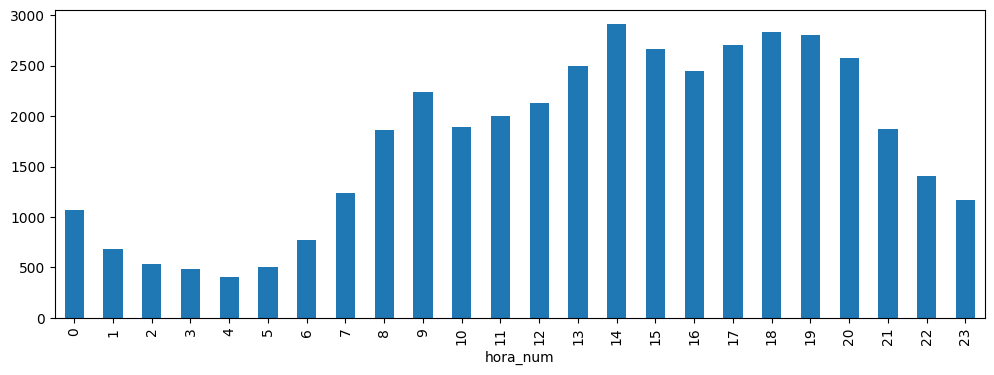

In [20]:
df_accidentes_copy['hora_num'].value_counts().sort_index().plot(kind='bar', figsize=(12,4))

- Franja horaria

In [22]:
df_accidentes_copy['franja'] = pd.cut( df_accidentes_copy['hora_num'], bins=[-1,6,12,18,24], labels=['Madrugada','Mañana','Tarde','Noche'] )

- Accidentes por día de la semana

<Axes: xlabel='dia_semana'>

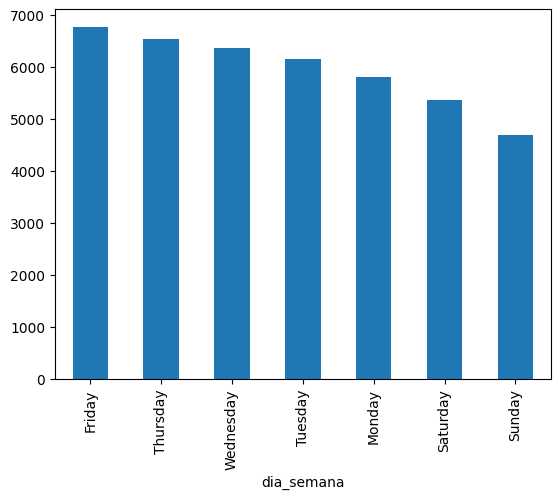

In [23]:
df_accidentes_copy['dia_semana'].value_counts().plot(kind='bar')

### Otras Cosas 

| Columna/Variable    | Descripción |
| ----------------    | ----------- |
| num_expediente      | Indica si el pasajero sobrevivió (1) o no (0) |
| fecha               | Clase del pasaje (1ª, 2ª, 3ª) |
| hora                | Género del pasajero |
| localizacion        | Edad del pasajero |
| numero	          | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| cod_distrito        | Número de padres/hijos a bordo |
| distrito            | Tarifa pagada por el pasajero |
| tipo_accidente      | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| estado_meteorológico| Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| tipo_vehiculo       | Categoría del pasajero (hombre, mujer, niño) |
| tipo_persona        | Booleano que indica si el pasajero es un hombre adulto |
| rango_edad          | Cubierta del barco donde se ubicaba el pasajero |
| sexo	              | Ciudad de embarque: Cherbourg; Queenstown; Southampton)  |
| cod_lesividad       | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| lesividad           | Booleano que indica si el pasajero viajaba solo |
| coordenada_x_utm    | Booleano que indica si el pasajero viajaba solo |
| coordenada_y_utm    | Booleano que indica si el pasajero viajaba solo |
| positiva_alcohol    | Booleano que indica si el pasajero viajaba solo |
| positiva_droga      | Booleano que indica si el pasajero viajaba solo |

In [23]:
df_accidentes[df_accidentes['num_expediente'].duplicated(keep=False)]

num_expediente       fecha      hora  \
0        2025S000056  01/01/2025   0:49:00   
1        2025S000056  01/01/2025   0:49:00   
2        2025S000056  01/01/2025   0:49:00   
3        2025S000057  01/01/2025   2:20:00   
4        2025S000057  01/01/2025   2:20:00   
...              ...         ...       ...   
41724    2025S125384  31/10/2025  21:15:00   
41725    2025S125384  31/10/2025  21:15:00   
41726    2025S125384  31/10/2025  21:15:00   
41728    2025S125950  31/10/2025  19:10:00   
41729    2025S125950  31/10/2025  19:10:00   

                                     localizacion numero  cod_distrito  \
0       CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
1       CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
2       CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO    140             5   
3      GTA. RIO ZANCARA / CALL. ARROYO DE POZUELO      1             9   
4      GTA. RIO ZANCARA / CALL. ARROYO DE POZUELO      1             9   
...                                           ...    ...           ...   
41724         PLAZA. INDEPENDENCIA / CALL. ALCALA      1             4   
41725         PLAZA. INDEPENDENCIA / CALL. ALCALA      1             4   
41726         PLAZA. INDEPENDENCIA / CALL. ALCALA      1             4   
41728         PLAZA DE CIBELES FRENTE A LA FUENTE      1             3   
41729         PLAZA DE CIBELES FRENTE A LA FUENTE      1             3   

              distrito           tipo_accidente estado_meteorológico  \
0            CHAMARTÍN  Colisión fronto-lateral            Despejado   
1            CHAMARTÍN  Colisión fronto-lateral            Despejado   
2            CHAMARTÍN  Colisión fronto-lateral            Despejado   
3      MONCLOA-ARAVACA         Colisión lateral            Despejado   
4      MONCLOA-ARAVACA         Colisión lateral            Despejado   
...                ...                      ...                  ...   
41724        SALAMANCA                  Alcance              Nublado   
41725        SALAMANCA                  Alcance              Nublado   
41726        SALAMANCA                  Alcance              Nublado   
41728           RETIRO         Colisión lateral            Despejado   
41729           RETIRO         Colisión lateral            Despejado   

      tipo_vehiculo tipo_persona       rango_edad    sexo  cod_lesividad  \
0        Ciclomotor    Conductor  De 30 a 34 años  Hombre            7.0   
1           Turismo    Conductor  De 40 a 44 años  Hombre           14.0   
2           Turismo     Pasajero  De 40 a 44 años   Mujer           14.0   
3           Turismo    Conductor  De 21 a 24 años  Hombre            NaN   
4           Turismo    Conductor  De 45 a 49 años  Hombre            NaN   
...             ...          ...              ...     ...            ...   
41724       Turismo     Pasajero  De 50 a 54 años  Hombre           14.0   
41725       Turismo     Pasajero  De 50 a 54 años   Mujer           14.0   
41726       Turismo     Pasajero  De 70 a 74 años  Hombre            1.0   
41728       Turismo    Conductor  De 40 a 44 años  Hombre            NaN   
41729       Turismo    Conductor  De 50 a 54 años  Hombre            NaN   

                                               lesividad  coordenada_x_utm  \
0      Asistencia sanitaria sólo en el lugar del acci...          442966.0   
1                               Sin asistencia sanitaria          442966.0   
2                               Sin asistencia sanitaria          442966.0   
3                                                    NaN          433911.0   
4                                                    NaN          433911.0   
...                                                  ...               ...   
41724                           Sin asistencia sanitaria          441509.0   
41725                           Sin asistencia sanitaria          441509.0   
41726        Atención en urgencias sin posterior ingreso          441509.0   
41728 

In [21]:
len(df_accidentes['num_expediente'][df_accidentes['num_expediente'].duplicated()].unique())

14968

In [22]:
df_accidentes['num_expediente'].value_counts().reset_index(name='frecuencia').query("frecuencia < 10")

num_expediente  frecuencia
30       2025S058437           9
31       2025S009471           9
32       2025S067739           9
33       2025S053198           9
34       2025S049801           9
...              ...         ...
17706    2025S105856           1
17707    2025S000840           1
17708    2025S000834           1
17709    2025S105976           1
17710    2025S106017           1

[17681 rows x 2 columns]

In [24]:
df_accidentes['num_expediente'].dtype

dtype('O')

In [25]:
type(df_accidentes['num_expediente'].iloc[0])

str

In [27]:
df_accidentes_copy["tipo_vehiculo"].unique()

array(['Ciclomotor', 'Turismo', 'Maquinaria de obras',
       'Motocicleta hasta 125cc', 'Furgoneta', 'Bicicleta',
       'Motocicleta > 125cc', 'Todo terreno', 'VMU eléctrico', 'Autobús',
       'Autobús articulado', 'Cuadriciclo no ligero', 'Camión rígido',
       'Vehículo articulado', 'Tractocamión', 'Semiremolque', 'No consta',
       'Bicicleta EPAC (pedaleo asistido)', 'Sin especificar',
       'Cuadriciclo ligero', 'Otros vehículos con motor', 'Autobus EMT',
       'Autocaravana', 'No aplica', 'Patinete no eléctrico',
       'Otros vehículos sin motor', 'Ciclomotor de dos ruedas L1e-B',
       'Caravana', 'Ciclo de motor L1e-A', 'Ambulancia SAMUR',
       'Microbús <= 17 plazas', 'Moto de tres ruedas > 125cc',
       'Tren/metro', 'Ciclo'], dtype=object)

In [28]:
df_accidentes_copy["tipo_accidente"].unique()

array(['Colisión fronto-lateral', 'Colisión lateral',
       'Choque contra obstáculo fijo', 'Alcance', 'Otro', 'Caída',
       'Atropello a persona', 'Colisión múltiple', 'Colisión frontal',
       'Solo salida de la vía', 'Atropello a animal', 'Vuelco',
       'Despeñamiento'], dtype=object)

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-------|
| customer                          | ID del cliente                                                             |                  |                     |       |
| state                             | Estados en US                                                              |                  |                     |       |
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación |                  |                     |   En dolares    |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       |                  |                     |       |
| coverage                          | Tipo de cobertura del cliente                                              |                  |                     |       |
| education                         | Nivel educativo del cliente                                                |                  |                     |       |
| effective_to_date                 | Fecha efectiva                                                             |                  |                     |       |
| employmentstatus                  | Estado laboral del cliente                                                 |                  |                     |       |
| gender                            | Género del cliente                                                         |                  |                     |       |
| income                            | Ingresos del cliente                                                       |                  |                     |       |
| location_code                     | Zona de residencia del cliente                                             |                  |                     |       |
| marital_status                    | Estado Civil del cliente                                                   |                  |                     |       |
| monthly_premium_auto              | Premium mensual                                                            |                  |                     |       |
| months_since_last_claim           | Última reclamación del cliente                                             |                  |                     |       |
| months_since_policy_inception     | Inicio de la póliza                                                        |                  |                     |       |
| number_of_open_complaints         | Reclamaciones abiertas                                                     |                  |                     |  Son partes, no quejas     |
| number_of_policies                | Número de pólizas                                                          |                  |                     |       |
| policy_type                       | Tipo de póliza                                                             |                  |                     |       |
| policy                            | Póliza                                                                     |                  |                     |       |
| renew_offer_type                  | Oferta de renovación                                                       |                  |                     |       |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         |                  |                     |  Puede continuar en otro canal diferente     |
| total_claim_amount                | Monto de la reclamación                                                    |                  |                     |       |
| vehicle_class                     | Tipo de vehículo                                                           |                  |                     |       |
| vehicle_size                      | Tamaño del vehículo                                                        |                  |                     |       |


In [26]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

df_registros=df_accidentes['num_expediente'] .value_counts().reset_index(name='frecuencia').query("frecuencia < 23")
df_registros

num_expediente  frecuencia
2        2025S109037          22
3        2025S084622          16
4        2025S061539          16
5        2025S075560          16
6        2025S096641          16
7        2025S005288          14
8        2025S021674          13
9        2025S005768          12
10       2025S099406          11
11       2025S105653          11
12       2025S021422          11
13       2025S065004          11
14       2025S015296          11
15       2025S064351          10
16       2025S053337          10
17       2025S003243          10
18       2025S006719          10
19       2025S104016          10
20       2025S023801          10
21       2025S023489          10
22       2025S095358          10
23       2025S001250          10
24       2025S043521          10
25       2025S062129          10
26       2025S030268          10
27       2025S037113          10
28       2025S109123          10
29       2025S044888          10
30       2025S058437           9
31       2025S009471           9
32       2025S067739           9
33       2025S053198           9
34       2025S049801           9
35       2025S054727           9
36       2025S082470           9
37       2025S035401           9
38       2025S046357           9
39       2025S090619           9
40       2025S039357           9
41       2025S091158           9
42       2025S014838           9
43       2025S023968           9
44       2025S019967           9
45       2025S115776           9
46       2025S015519           9
47       2025S015691           9
48       2025S122339           9
49       2025S121042           9
50       2025S117810           8
51       2025S019959           8
52       2025S064893           8
53       2025S114181           8
54       2025S080350           8
55       2025S084220           8
56       2025S058077           8
57       2025S021752           8
58       2025S006396           8
59       2025S006428           8
60       2025S007773           8
61       2025S006777           8
62       2025S028643           8
63       2025S064391           8
64       2025S011063           8
65       2025S006038           8
66       2025S073225           8
67       2025S122514           8
68       2025S037153           8
69       2025S066553           8
70       2025S043445           8
71       2025S011724           8
72       2025S106596           8
73       2025S024488           8
74       2025S084807           8
75       2025S024210           8
76       2025S081759           8
77       2025S086013           8
78       2025S054766           8
79       2025S099871           8
80       2025S102820           8
81       2025S098021           8
82       2025S102831           8
83       2025S040604           8
84       2025S003753           8
85       2025S052282           8
86       2025S046821           8
87       2025S092458           8
88       2025S100488           8
89       2025S044299           8
90       2025S086727           8
91       2025S069725           7
92       2025S016067           7
93       2025S071355           7
94       2025S019312           7
95       2025S019161           7
96       2025S119038           7
97       2025S118200           7
98       2025S117957           7
99       2025S069998           7
100      2025S114536           7
101      2025S058200           7
102      2025S055274           7
103      2025S055272           7
104      2025S082556           7
105      2025S023877           7
106      2025S080495           7
107      2025S023324           7
108      2025S064001           7
109      2025S083862           7
110      2025S054724           7
111      2025S115503           7
112      2025S017702           7
113      2025S021818           7
114      2025S061303           7
115      2025S057235           7
116      2025S079847           7
117      2025S061222           7
118      2025S115651           7
119      2025S063055           7
120      2025S063253           7
121      2025S021817           7
122      2025